In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [4]:
# Manage paths
%run setup_notebooks.py

In [5]:
from toolbox import wandb_export
from src import setup

In [6]:
import logging
logging.getLogger().setLevel(logging.INFO)

In [7]:
import wandb
from toolbox.wandb_export import process_runs

# Equiv-GIN Baseline 
No data aug


##  Coarse sweep



In [151]:
sweep = 'scsy07dm'

api = wandb.Api()
sweep = api.sweep(f'mazeller/egnn-mi/{sweep}')

In [196]:
df, df_config = process_runs(sweep.runs)

2022-04-07 17:43:29,525 [wandb_export] [INFO] extracting runs metadata
2022-04-07 17:43:29,531 [wandb_export] [INFO] extracting runs summary and config
2022-04-07 17:43:30,181 [wandb_export] [INFO] expanding column val.macro avg
2022-04-07 17:43:30,182 [wandb_export] [INFO] expanding column val.weighted avg
2022-04-07 17:43:30,184 [wandb_export] [INFO] expanding column val.0
2022-04-07 17:43:30,186 [wandb_export] [INFO] expanding column val.1
2022-04-07 17:43:30,730 [wandb_export] [INFO] expanding column train.macro avg
2022-04-07 17:43:30,731 [wandb_export] [INFO] expanding column train.weighted avg
2022-04-07 17:43:30,733 [wandb_export] [INFO] expanding column train.0
2022-04-07 17:43:30,735 [wandb_export] [INFO] expanding column train.1
2022-04-07 17:43:30,828 [wandb_export] [INFO] expanding column val
2022-04-07 17:43:30,830 [wandb_export] [INFO] expanding column train


In [218]:
mask = df['train.loss'].isna() | df['train.loss'].apply(lambda e: not isinstance(e, float))
mask = mask | df['train.loss'].isna() | df['train.loss'].apply(lambda e: not isinstance(e, float))
keep = mask[~mask].index

print(df.shape)
df = df.loc[keep]
print(df.shape)

(172, 53)
(170, 53)


In [221]:
metrics = [
    'train.loss', 'val.loss', 'val_f1_score'
] + [
    f'{t}.{n}.f1-score'
    for t in ('val', 'train')
    for n in ('0', '1')
]

df.sort_values(['val_f1_score', 'val.1.f1-score', 'val.loss'], ascending=[False, False, True], inplace=True)

df[metrics].iloc[30:50]

,train.loss,val.loss,val_f1_score,val.0.f1-score,val.1.f1-score,train.0.f1-score,train.1.f1-score
id,,,,,,,
het7z4d8,0.673507,0.647527,0.651801,0.730769,0.588235,0.666667,0.484848
74xvpdyx,0.676752,0.647623,0.651801,0.730769,0.588235,0.666667,0.484848
u1amw33b,0.679829,0.647795,0.651801,0.730769,0.588235,0.666667,0.484848
70fe71c1,0.678581,0.648113,0.651801,0.730769,0.588235,0.666667,0.484848
yoiuylng,0.67273,0.648121,0.651801,0.730769,0.588235,0.671053,0.500000
y6yshdmx,0.67183,0.648314,0.651801,0.730769,0.588235,0.671053,0.500000
5xi1ahoa,0.675965,0.64848,0.651801,0.730769,0.588235,0.671053,0.500000
ee4bnieq,0.669884,0.648524,0.651801,0.730769,0.588235,0.671053,0.500000
4ltnjltr,0.675526,0.64859,0.651801,0.730769,0.588235,0.666667,0.484848


In [228]:
mask = df_config.nunique() > 1
hyperparams = mask[mask].index.tolist()
hyperparams

['epochs',
 'num_gin',
 'num_equiv',
 'loss.weight',
 'optimizer.lr',
 'num_hidden_dim']

In [235]:
df_config.loc[df.iloc[:15].index, hyperparams]

,epochs,num_gin,num_equiv,loss.weight,optimizer.lr,num_hidden_dim
id,,,,,,
syly74pv,92,0,4,0.449682,0.004415,8
gddctx4y,112,2,5,0.452444,0.005457,12
3xrhznch,128,1,3,0.473356,0.001516,8
l1t6fpcp,173,3,4,0.466382,0.003098,8
ciy676xy,82,1,5,0.478941,0.004206,8
peaoxea0,167,2,4,0.487368,0.004735,12
cpxioom1,178,2,3,0.489202,0.004292,8
xb46vrqg,128,3,5,0.495559,0.003681,12
zpeozjui,124,1,3,0.490949,0.004619,8


In [239]:
df.sort_values('val.1.f1-score', ascending=False, inplace=True)
df[metrics].iloc[:10]

,train.loss,val.loss,val_f1_score,val.0.f1-score,val.1.f1-score,train.0.f1-score,train.1.f1-score
id,,,,,,,
hkwz9w4c,0.603088,0.632298,0.528926,0.457143,0.627451,0.424242,0.627451
6gwjv9jn,0.669347,0.653699,0.627586,0.636364,0.619048,0.573770,0.600000
biojjte8,0.660205,0.675486,0.646465,0.680851,0.615385,0.614286,0.517857
wauowzbs,0.617202,0.715111,0.510638,0.444444,0.600000,0.469388,0.662338
b7pvtfwd,0.671585,0.637763,0.551181,0.512821,0.595745,0.516667,0.560606
pbu9gvly,0.675278,0.644088,0.551181,0.512821,0.595745,0.388889,0.541667
jabkd0ux,0.671912,0.646194,0.551181,0.512821,0.595745,0.516667,0.560606
ftoo8094,0.669039,0.648964,0.551181,0.512821,0.595745,0.516667,0.560606
tv4gpboe,0.675933,0.648974,0.551181,0.512821,0.595745,0.516667,0.560606


In [241]:
df_config.loc[df.iloc[:10].index][hyperparams]

,epochs,num_gin,num_equiv,loss.weight,optimizer.lr,num_hidden_dim
id,,,,,,
hkwz9w4c,350,0,1,0.736973,0.006583,12
6gwjv9jn,117,2,4,0.623833,0.001962,5
biojjte8,77,1,1,0.536645,0.003551,16
wauowzbs,146,2,5,0.678846,0.002288,8
b7pvtfwd,178,3,6,0.659544,0.003778,16
pbu9gvly,123,2,6,0.655436,0.003474,12
jabkd0ux,117,3,6,0.644389,0.002528,12
ftoo8094,172,2,3,0.627813,0.001216,8
tv4gpboe,161,3,7,0.632110,0.007975,12


## Finer sweep

In [242]:
sweep = 'h6eypbqk'
sweep = api.sweep(f'mazeller/egnn-mi/{sweep}')
runs = sweep.runs
len(runs)

240

In [243]:
df, df_config = process_runs(runs)

2022-04-07 23:21:44,846 [wandb_export] [INFO] extracting runs metadata
2022-04-07 23:21:52,477 [wandb_export] [INFO] extracting runs summary and config
2022-04-07 23:21:53,585 [wandb_export] [INFO] expanding column val.macro avg
2022-04-07 23:21:53,587 [wandb_export] [INFO] expanding column val.weighted avg
2022-04-07 23:21:53,590 [wandb_export] [INFO] expanding column val.0
2022-04-07 23:21:53,592 [wandb_export] [INFO] expanding column val.1
2022-04-07 23:21:54,299 [wandb_export] [INFO] expanding column train.0
2022-04-07 23:21:54,301 [wandb_export] [INFO] expanding column train.1
2022-04-07 23:21:54,313 [wandb_export] [INFO] expanding column train.macro avg
2022-04-07 23:21:54,316 [wandb_export] [INFO] expanding column train.weighted avg
2022-04-07 23:21:54,378 [wandb_export] [INFO] expanding column val
2022-04-07 23:21:54,383 [wandb_export] [INFO] expanding column train


In [264]:
mask = df_config.nunique() > 1
hyperparams = mask[mask].index.drop('cv.fold_id').tolist()
hyperparams

['epochs', 'num_gin', 'num_equiv', 'loss.weight', 'num_hidden_dim']

In [277]:
grouped = df.join(df_config[hyperparams]).groupby(hyperparams)

assert (grouped.count() == 5).all(axis=None)

res = grouped.agg(['mean', 'std'])[metrics]
res.sort_values(('val_f1_score', 'mean'),  ascending=False, inplace=True)
res.iloc[:15]

train.loss            \
                                                          mean       std   
epochs num_gin num_equiv loss.weight num_hidden_dim                        
130    0       5         0.65        8                0.644491  0.012730   
               3         0.65        5                0.642398  0.010708   
                                     12               0.643456  0.018777   
       1       3         0.65        8                0.653989  0.013757   
                                     5                0.658864  0.011710   
       0       5         0.65        12               0.636234  0.013039   
               3         0.65        8                0.655726  0.017764   
                         0.45        8                0.625831  0.020040   
90     0       3         0.65        8                0.650796  0.008553   
130    1       5         0.65        12               0.649665  0.004228   
90     0       5         0.65        8                0.647954  0.014211   
130    1       5         0.65        8                0.652518  0.008557   
90     0       3         0.65        5                0.647366  0.017537   
                         0.45        8                0.640420  0.007626   
               5         0.45        8                0.635899  0.008940   

                                                     val.loss            \
                                                         mean       std   
epochs num_gin num_equiv loss.weight num_hidden_dim                       
130    0       5         0.65        8               0.702752  0.047623   
               3         0.65        5               0.696746  0.050954   
                                     12              0.703012  0.048826   
       1       3         0.65        8               0.703344  0.050063   
                                     5               0.698287  0.057257   
       0       5         0.65        12              0.705561  0.041806   
               3         0.65        8               0.694753  0.060091   
                         0.45        8               0.685105  0.032502   
90     0       3         0.65        8               0.709306  0.040621   
130    1       5         0.65        12              0.709163  0.042785   
90     0       5         0.65        8               0.698238  0.043883   
130    1       5         0.65        8               0.707869  0.047262   
90     0       3         0.65        5               0.693935  0.047176   
                         0.45        8               0.672322  0.041584   
               5         0.45        8               0.683257  0.046886   

                                                    val_f1_score            \
                                                            mean       std   
epochs num_gin num_equiv loss.weight num_hidden_dim                          
130    0       5         0.65        8                  0.498487  0.118773   
               3         0.65        5                  0.496777  0.053197   
                                     12                 0.482907  0.099886   
       1       3         0.65        8                  0.453021  0.127920   
                                     5                  0.450902  0.152034   
       0       5         0.65        12                 0.449419  0.072184   
               3         0.65        8                  0.437611  0.126728   
                         0.45        8                  0.436633  0.108056   
90     0       3         0.65        8                  0.430797  0.070113   
130    1       5         0.65        12                 0.423561  0.072417   
90     0       5         0.65        8                  0.419935  0.191030   
130    1       5         0.65        8                  0.417379  0.110194   
90     0       3         0.65        5                  0.414073  0.069721   
                         0.45        8                  0.412741  0.240223   
      

# Equiv GIN with noise

In [9]:
api = wandb.Api()

In [10]:
sweep = '1szkegyu'
sweep = api.sweep('mazeller/egnn-mi/' + sweep)
runs = sweep.runs
len(runs)

240

In [11]:
df, df_config = process_runs(runs)

2022-04-09 11:44:59,143 [wandb_export] [INFO] extracting runs metadata
2022-04-09 11:45:07,222 [wandb_export] [INFO] extracting runs summary and config
2022-04-09 11:45:08,144 [wandb_export] [INFO] expanding column val.macro avg
2022-04-09 11:45:08,146 [wandb_export] [INFO] expanding column val.weighted avg
2022-04-09 11:45:08,148 [wandb_export] [INFO] expanding column val.0
2022-04-09 11:45:08,150 [wandb_export] [INFO] expanding column val.1
2022-04-09 11:45:08,846 [wandb_export] [INFO] expanding column train.macro avg
2022-04-09 11:45:08,847 [wandb_export] [INFO] expanding column train.weighted avg
2022-04-09 11:45:08,850 [wandb_export] [INFO] expanding column train.0
2022-04-09 11:45:08,852 [wandb_export] [INFO] expanding column train.1
2022-04-09 11:45:08,999 [wandb_export] [INFO] expanding column val
2022-04-09 11:45:09,003 [wandb_export] [INFO] expanding column train


In [12]:
mask = df_config.nunique() > 1
hyperparams = mask[mask].index.drop('cv.fold_id').tolist()
hyperparams

['epochs', 'num_gin', 'num_equiv', 'loss.weight', 'num_hidden_dim']

In [17]:
grouped = df.join(df_config[hyperparams]).groupby(hyperparams)

assert (grouped.count() == 5).all(axis=None)

metrics = [
    'train.loss', 'val.loss', 'val_f1_score'
] + [
    f'{t}.{n}.f1-score'
    for t in ('val', 'train')
    for n in ('0', '1')
]

res = grouped[metrics].agg(['mean', 'std', 'min']).sort_values(('val_f1_score', 'mean'), ascending=False)
res.iloc[:20]

val_f1_score            \
                                                            mean       std   
epochs num_gin num_equiv loss.weight num_hidden_dim                          
90     0       3         0.65        8                  0.535372  0.079790   
               5         0.65        5                  0.504951  0.054318   
               3         0.65        5                  0.469558  0.085162   
130    0       3         0.65        5                  0.463817  0.070875   
               5         0.45        5                  0.442444  0.263615   
90     1       3         0.65        5                  0.441706  0.127084   
               5         0.65        8                  0.433459  0.104202   
130    0       3         0.65        8                  0.424169  0.237591   
90     0       3         0.45        8                  0.409816  0.241553   
                                     5                  0.371034  0.226750   
       1       5         0.65        5                  0.361916  0.065090   
       0       5         0.65        8                  0.361497  0.222727   
130    1       5         0.65        12                 0.353020  0.069128   
90     1       3         0.65        12                 0.348185  0.217904   
130    0       3         0.45        5                  0.340875  0.311759   
       1       3         0.45        8                  0.337732  0.203845   
                         0.65        5                  0.336347  0.239601   
               5         0.45        8                  0.315624  0.294970   
90     0       3         0.45        12                 0.307984  0.300966   
130    0       3         0.45        8                  0.306929  0.295495   

                                                              val.0.f1-score  \
                                                          min           mean   
epochs num_gin num_equiv loss.weight num_hidden_dim                            
90     0       3         0.65        8               0.418511       0.561532   
               5         0.65        5               0.440079       0.482268   
               3         0.65        5               0.335664       0.404347   
130    0       3         0.65        5               0.406780       0.448659   
               5         0.45        5               0.000000       0.699583   
90     1       3         0.65        5               0.321429       0.412725   
               5         0.65        8               0.321429       0.424162   
130    0       3         0.65        8               0.000000       0.408097   
90     0       3         0.45        8               0.000000       0.652825   
                                     5               0.000000       0.639538   
       1       5         0.65        5               0.305344       0.336790   
       0       5         0.65        8               0.000000       0.350168   
130    1       5         0.65        12              0.305344       0.324860   
90     1       3         0.65        12              0.000000       0.306328   
130    0       3         0.45        5               0.000000       0.726400   
       1       3         0.45        8               0.000000       0.645087   
                         0.65        5               0.000000       0.452855   
               5         0.45        8               0.000000       0.676654   
90     0       3         0.45        12              0.000000       0.695660   
130    0       3         0.45        8               0.000000       0.708798   

                                                                         \
                                                          std       min   
epochs num_gin num_equiv loss.weight num_hidden_dim                       
90     0       3         0.65        8               0.074580  0.437500   
               5         0.65        5               0.076416  0.413793   
               3         0.65        5   

In [16]:
res.nlargest(10, ('val_f1_score', 'max'))

val_f1_score            \
                                                            mean       std   
epochs num_gin num_equiv loss.weight num_hidden_dim                          
90     0       3         0.45        12                 0.307984  0.300966   
130    0       5         0.45        5                  0.442444  0.263615   
       1       3         0.65        5                  0.336347  0.239601   
90     1       5         0.65        12                 0.254444  0.268914   
130    0       5         0.65        12                 0.128571  0.287494   
90     0       3         0.45        8                  0.409816  0.241553   
130    0       5         0.45        8                  0.194692  0.285591   
       1       5         0.45        8                  0.315624  0.294970   
       0       3         0.45        8                  0.306929  0.295495   
90     1       3         0.65        5                  0.441706  0.127084   

                                                              val.0.f1-score  \
                                                          max           mean   
epochs num_gin num_equiv loss.weight num_hidden_dim                            
90     0       3         0.45        12              0.680851       0.695660   
130    0       5         0.45        5               0.676851       0.699583   
       1       3         0.65        5               0.672897       0.452855   
90     1       5         0.65        12              0.645161       0.382231   
130    0       5         0.65        12              0.642857       0.424878   
90     0       3         0.45        8               0.631579       0.652825   
130    0       5         0.45        8               0.631579       0.737841   
       1       5         0.45        8               0.629213       0.676654   
       0       3         0.45        8               0.629213       0.708798   
90     1       3         0.65        5               0.612766       0.412725   

                                                                         \
                                                          std       max   
epochs num_gin num_equiv loss.weight num_hidden_dim                       
90     0       3         0.45        12              0.059172  0.761905   
130    0       5         0.45        5               0.054817  0.744186   
       1       3         0.65        5               0.247397  0.736842   
90     1       5         0.65        12              0.306446  0.740741   
130    0       5         0.65        12              0.388779  0.740741   
90     0       3         0.45        8               0.087728  0.750000   
130    0       5         0.45        8               0.012331  0.750000   
       1       5         0.45        8               0.054333  0.736842   
       0       3         0.45        8               0.051556  0.744186   
90     1       3         0.65        5               0.160768  0.648649   

                                                    val.1.f1-score            \
                                                              mean       std   
epochs num_gin num_equiv loss.weight num_hidden_dim                            
90     0       3         0.45        12                   0.254545  0.263173   
130    0       5         0.45        5                    0.378073  0.241868   
       1       3         0.65        5                    0.402021  0.249294   
90     1       5         0.65        12                   0.412812  0.257726   
130    0       5         0.65        12                   0.358452  0.327535   
90     0       3         0.45        8                    0.349832  0.214415   
130    0       5         0.45        8                    0.153535  0.239289   
       1       5         0.45        8                    0.268132  0.256376   
       0       3         0.45        8                    0.250670  0.253816   
90     1       3         0.65        5                    0.

In [51]:
def get_config_ids(index_config, df, df_config, hyperparams):
    df_ids = df.join(df_config[hyperparams]).reset_index().groupby(hyperparams)['id'].unique().reset_index()
    
    ids = []
    for conf in index_config:
        item = df_ids
        for val, col in zip(conf, index_config.names):
            item = item[item[col] == val]
        
        assert item.shape[0] == 1
        ids.append(item)
        
    return pd.concat(ids)

In [55]:
get_config_ids(res.iloc[:2].index, df, df_config, hyperparams)

,epochs,num_gin,num_equiv,loss.weight,num_hidden_dim,id
4,90,0,3,0.65,8,"[4iqt5d9z, yjsnf3j0, phvkkq5h, lwr23gic, rwfki..."
9,90,0,5,0.65,5,"[8tgklibq, skozunib, h7vfvbxa, t9dkmq3z, zdybh..."


##  Equiv GIN + diffusion

In [6]:
import wandb

In [7]:
df = pd.read_csv('data/wandb_export_sweep_68nkvor6.csv')
df

,Name,Agent,State,Notes,User,Tags,Created,Runtime,Sweep,allow_stop,...,val.precision,val.recall,val.roc_auc,val.support,val.weighted avg.f1-score,val.weighted avg.precision,val.weighted avg.recall,val.weighted avg.support,val_f1_score,val_loss
0,brisk-sweep-240,73zkcep6,finished,-,mazeller,NaN,2022-04-15T18:10:52.000Z,159,68nkvor6,1000,...,NaN,NaN,NaN,NaN,0.319430,0.343891,0.323529,34.0,0.321716,0.783334
1,driven-sweep-239,73zkcep6,finished,-,mazeller,NaN,2022-04-15T18:08:32.000Z,138,68nkvor6,1000,...,NaN,NaN,NaN,NaN,0.435730,0.346021,0.588235,34.0,0.000000,0.867714
2,atomic-sweep-238,73zkcep6,finished,-,mazeller,NaN,2022-04-15T18:06:23.000Z,123,68nkvor6,1000,...,NaN,NaN,NaN,NaN,0.319430,0.343891,0.323529,34.0,0.321716,0.788524
3,skilled-sweep-237,73zkcep6,finished,-,mazeller,NaN,2022-04-15T18:03:42.000Z,156,68nkvor6,1000,...,NaN,NaN,NaN,NaN,0.415893,0.422794,0.411765,34.0,0.391304,0.750875
4,fanciful-sweep-236,73zkcep6,finished,-,mazeller,NaN,2022-04-15T18:01:18.000Z,137,68nkvor6,1000,...,NaN,NaN,NaN,NaN,0.443647,0.446852,0.441176,34.0,0.412371,0.785541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,efficient-sweep-5,73zkcep6,finished,-,mazeller,NaN,2022-04-15T11:05:49.000Z,72,68nkvor6,1000,...,NaN,NaN,NaN,NaN,0.473262,0.551471,0.583333,36.0,0.202532,0.629696
236,charmed-sweep-4,73zkcep6,finished,-,mazeller,NaN,2022-04-15T11:04:36.000Z,67,68nkvor6,1000,...,NaN,NaN,NaN,NaN,0.429825,0.340278,0.583333,36.0,0.000000,0.623439
237,splendid-sweep-3,73zkcep6,finished,-,mazeller,NaN,2022-04-15T11:03:13.000Z,79,68nkvor6,1000,...,NaN,NaN,NaN,NaN,0.429825,0.340278,0.583333,36.0,0.000000,0.682114
238,azure-sweep-2,73zkcep6,finished,-,mazeller,NaN,2022-04-15T11:01:56.000Z,73,68nkvor6,1000,...,NaN,NaN,NaN,NaN,0.416667,0.333333,0.555556,36.0,0.000000,0.628620


In [25]:
hyperparams = ['epochs', 'loss.weight', 'num_equiv', 'num_gin', 'num_hidden_dim']

metrics = ['val_f1_score'] + [
    f'{t}.1.{m}'
    for t in ('train', 'val')
    for m in ('f1-score', )
]
df.groupby(hyperparams)[metrics].agg(['mean', 'std', 'min', 'max']).sort_values(('val_f1_score', 'mean'), ascending=False).iloc[:10]

val_f1_score            \
                                                            mean       std   
epochs loss.weight num_equiv num_gin num_hidden_dim                          
90     0.65        3         0       5                  0.537118  0.078882   
130    0.65        3         0       8                  0.533264  0.053761   
90     0.65        3         0       12                 0.510469  0.120099   
130    0.65        5         0       5                  0.428561  0.247269   
90     0.65        5         0       8                  0.424140  0.086026   
130    0.65        3         0       12                 0.422052  0.061116   
                             1       5                  0.419359  0.093905   
                             0       5                  0.413542  0.063179   
       0.45        3         0       5                  0.401273  0.232101   
90     0.65        5         1       5                  0.388884  0.101174   

                                                                         \
                                                          min       max   
epochs loss.weight num_equiv num_gin num_hidden_dim                       
90     0.65        3         0       5               0.453686  0.664537   
130    0.65        3         0       8               0.474453  0.612245   
90     0.65        3         0       12              0.321716  0.627646   
130    0.65        5         0       5               0.000000  0.614035   
90     0.65        5         0       8               0.321716  0.526316   
130    0.65        3         0       12              0.338983  0.500000   
                             1       5               0.321429  0.521481   
                             0       5               0.321716  0.499133   
       0.45        3         0       5               0.000000  0.603774   
90     0.65        5         1       5               0.305344  0.521481   

                                                    train.1.f1-score  \
                                                                mean   
epochs loss.weight num_equiv num_gin num_hidden_dim                    
90     0.65        3         0       5                      0.606520   
130    0.65        3         0       8                      0.637589   
90     0.65        3         0       12                     0.621446   
130    0.65        5         0       5                      0.616176   
90     0.65        5         0       8                      0.606453   
130    0.65        3         0       12                     0.616639   
                             1       5                      0.597086   
                             0       5                      0.629649   
       0.45        3         0       5                      0.420785   
90     0.65        5         1       5                      0.590856   

                                                                         \
                                                          std       min   
epochs loss.weight num_equiv num_gin num_hidden_dim                       
90     0.65        3         0       5               0.037665  0.547445   
130    0.65        3         0       8               0.035200  0.602317   
90     0.65        3         0       12              0.013603  0.601399   
130    0.65        5         0       5               0.032408  0.582278   
90     0.65        5         0       8               0.028336  0.573477   
130    0.65        3         0       12              0.031340  0.589641   
                             1       5               0.025324  0.571429   
                             0       5               0.026388  0.605678   
       0.45        3         0       5               0.134704  0.251656   
90     0.65        5         1       5               0.020126  0.571429   

                                                              val.1.f1-score  \
                                                          max       

## Sweep k62t9439

CoordToCnc no data aug, Equiv model, classifier has +1 layer

In [8]:
sweep = wandb.Api().sweep('mazeller/egnn-mi/k62t9439')
df, df_config = process_runs(sweep.runs)

2022-04-19 10:39:56,276 [wandb_export] [INFO] extracting runs metadata
2022-04-19 10:40:02,121 [wandb_export] [INFO] extracting runs summary and config
2022-04-19 10:40:02,663 [wandb_export] [INFO] expanding column val.0
2022-04-19 10:40:02,665 [wandb_export] [INFO] expanding column val.1
2022-04-19 10:40:02,667 [wandb_export] [INFO] expanding column val.macro avg
2022-04-19 10:40:02,669 [wandb_export] [INFO] expanding column val.weighted avg
2022-04-19 10:40:02,995 [wandb_export] [INFO] expanding column train.0
2022-04-19 10:40:02,996 [wandb_export] [INFO] expanding column train.1
2022-04-19 10:40:02,998 [wandb_export] [INFO] expanding column train.macro avg
2022-04-19 10:40:03,000 [wandb_export] [INFO] expanding column train.weighted avg
2022-04-19 10:40:03,053 [wandb_export] [INFO] expanding column val
2022-04-19 10:40:03,057 [wandb_export] [INFO] expanding column train


In [21]:
mask = df_config.nunique() > 1
hyperparams = mask[mask].index.drop('cv.fold_id').tolist()
hyperparams

['epochs', 'loss.weight', 'optimizer.lr', 'num_hidden_dim']

In [54]:
metrics = ['val_f1_score'] + [
    f'{t}.0.{m}'
    for t in ('train', 'val')
    for m in ('f1-score', )
]

grouped = df.join(df_config[hyperparams]).groupby(hyperparams)
res = grouped[metrics].agg(['mean', 'std', 'min', 'max'])
res.sort_values(('val_f1_score', 'mean'), ascending=False, inplace=True)
res

val_f1_score            \
                                                       mean       std   
epochs loss.weight optimizer.lr num_hidden_dim                          
90     0.65        0.004        5                  0.445460  0.148992   
                                12                 0.422843  0.080282   
                   0.010        5                  0.388884  0.101174   
                                12                 0.386583  0.107309   
       0.45        0.004        8                  0.384458  0.219585   
130    0.65        0.004        5                  0.374595  0.215129   
                                8                  0.368852  0.055759   
       0.45        0.004        5                  0.362129  0.223332   
       0.65        0.004        12                 0.359953  0.221045   
                   0.010        5                  0.334887  0.214766   
                                8                  0.332917  0.213004   
90     0.65        0.004        8                  0.323348  0.187666   
       0.45        0.010        8                  0.315624  0.294970   
                                5                  0.315624  0.294970   
       0.65        0.010        8                  0.302451  0.180819   
130    0.45        0.004        12                 0.283981  0.264291   
90     0.45        0.004        12                 0.282456  0.257885   
130    0.45        0.004        8                  0.275260  0.277932   
                   0.010        5                  0.227735  0.318976   
       0.65        0.010        12                 0.219366  0.207389   
90     0.45        0.010        12                 0.189781  0.259868   
                   0.004        5                  0.102045  0.144592   
130    0.45        0.010        12                 0.094891  0.212182   
                                8                  0.094891  0.212182   

                                                                    \
                                                     min       max   
epochs loss.weight optimizer.lr num_hidden_dim                       
90     0.65        0.004        5               0.294118  0.665116   
                                12              0.338983  0.545455   
                   0.010        5               0.305344  0.521481   
                                12              0.305344  0.558140   
       0.45        0.004        8               0.000000  0.545455   
130    0.65        0.004        5               0.000000  0.529412   
                                8               0.320388  0.453686   
       0.45        0.004        5               0.000000  0.589474   
       0.65        0.004        12              0.000000  0.578313   
                   0.010        5               0.000000  0.525896   
                                8               0.000000  0.569083   
90     0.65        0.004        8               0.000000  0.454545   
       0.45        0.010        8               0.000000  0.629213   
                                5               0.000000  0.629213   
       0.65        0.010        8               0.000000  0.477396   
130    0.45        0.004        12              0.000000  0.545455   
90     0.45        0.004        12              0.000000  0.474453   
130    0.45        0.004        8               0.000000  0.629213   
                   0.010        5               0.000000  0.664225   
       0.65        0.010        12              0.000000  0.453686   
90     0.45        0.010        12              0.000000  0.474453   
                   0.004        5               0.000000  0.307692   
130    0.45        0.010        12              0.000000  0.474453   
                                8               0.000000  0.474453   

                                               train.0.f1-score            \
                                                           mean       std   
epochs loss.weight optimizer.l

In [53]:
tmp = df.join(df_config, rsuffix='_')[metrics + ['cv.fold_id']]
tmp.sort_values('val_f1_score').iloc[:10]

,val_f1_score,train.1.f1-score,val.1.f1-score,cv.fold_id
id,,,,
tnwkabv1,0.0,0.591837,0.622222,3
4l7qflei,0.0,0.000000,0.000000,2
ky5l1961,0.0,0.591837,0.622222,3
gn9i2yo1,0.0,0.000000,0.000000,3
y802xgsn,0.0,0.000000,0.000000,3
tplwx4xk,0.0,0.000000,0.000000,3
fuvaet5d,0.0,0.000000,0.000000,3
t1gl7sg3,0.0,0.000000,0.000000,3
zzwls0k1,0.0,0.000000,0.000000,3


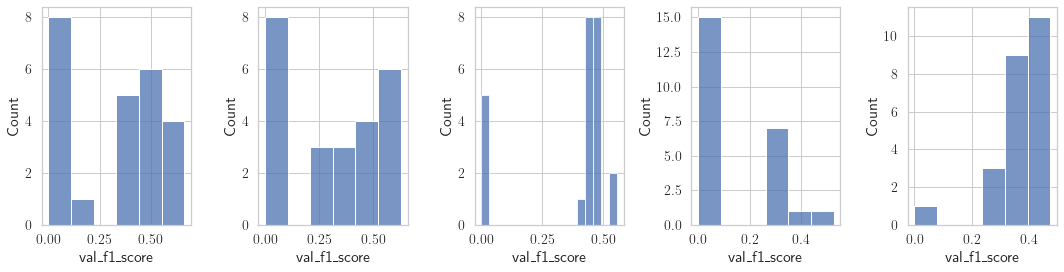

In [52]:
_, ax = plt.subplots(1, 5, figsize=(15, 4))
for i,a in enumerate(ax):
    sns.histplot(x='val_f1_score', data=tmp[tmp['cv.fold_id'] == i], palette='deep', ax=a)
    
plt.tight_layout()

In [47]:
tmp.groupby('cv.fold_id')['val_f1_score'].describe()

,count,mean,std,min,25%,50%,75%,max
cv.fold_id,,,,,,,,
0,24.0,0.319509,0.249228,0.0,0.000000,0.399561,0.521481,0.665116
1,24.0,0.305901,0.243220,0.0,0.000000,0.320388,0.494411,0.629213
2,24.0,0.369642,0.196165,0.0,0.424803,0.453686,0.474453,0.558140
3,24.0,0.131259,0.177563,0.0,0.000000,0.000000,0.321429,0.525896
4,24.0,0.371401,0.109890,0.0,0.321716,0.322378,0.474453,0.474453


## Random diffusion + original data


In [8]:
sweep = wandb.Api().sweep('mazeller/egnn-mi/b4qohfm6')
df, df_config = process_runs(sweep.runs)

2022-04-20 12:29:25,880 [wandb_export] [INFO] extracting runs metadata
2022-04-20 12:29:31,508 [wandb_export] [INFO] extracting runs summary and config
2022-04-20 12:29:32,046 [wandb_export] [INFO] expanding column val.macro avg
2022-04-20 12:29:32,048 [wandb_export] [INFO] expanding column val.weighted avg
2022-04-20 12:29:32,049 [wandb_export] [INFO] expanding column val.0
2022-04-20 12:29:32,052 [wandb_export] [INFO] expanding column val.1
2022-04-20 12:29:32,390 [wandb_export] [INFO] expanding column train.macro avg
2022-04-20 12:29:32,391 [wandb_export] [INFO] expanding column train.weighted avg
2022-04-20 12:29:32,393 [wandb_export] [INFO] expanding column train.0
2022-04-20 12:29:32,395 [wandb_export] [INFO] expanding column train.1
2022-04-20 12:29:32,419 [wandb_export] [INFO] expanding column val
2022-04-20 12:29:32,423 [wandb_export] [INFO] expanding column train


In [9]:
mask = df_config.nunique() > 1
hyperparams = mask[mask].index.drop('cv.fold_id').tolist()
hyperparams

['epochs', 'loss.weight', 'optimizer.lr', 'num_hidden_dim']

In [12]:
metrics = ['val_f1_score'] + [
    f'{t}.1.{m}'
    for t in ('train', 'val')
    for m in ('f1-score', 'recall')
]

grouped = df.join(df_config[hyperparams]).groupby(hyperparams)
res = grouped[metrics].agg(['mean', 'std', 'min', 'max'])
res.sort_values(('val_f1_score', 'mean'), ascending=False, inplace=True)
res

val_f1_score            \
                                                       mean       std   
epochs loss.weight optimizer.lr num_hidden_dim                          
130    0.50        0.010        5                  0.581226  0.098918   
90     0.50        0.010        5                  0.581226  0.098918   
                   0.004        5                  0.558739  0.098058   
130    0.50        0.004        8                  0.545731  0.088065   
                                5                  0.508138  0.135457   
90     0.50        0.004        12                 0.495074  0.200162   
130    0.50        0.010        8                  0.486336  0.283082   
90     0.65        0.004        5                  0.467728  0.092631   
       0.50        0.010        8                  0.455384  0.271790   
       0.65        0.004        8                  0.452807  0.116368   
130    0.65        0.004        5                  0.449233  0.131340   
90     0.50        0.004        8                  0.438466  0.262285   
130    0.65        0.004        8                  0.423007  0.146495   
90     0.65        0.010        5                  0.411155  0.094744   
                                8                  0.387327  0.099575   
130    0.65        0.010        5                  0.371217  0.235986   
                   0.004        12                 0.370480  0.238184   
90     0.65        0.004        12                 0.333694  0.228246   
130    0.65        0.010        12                 0.327816  0.204053   
       0.50        0.004        12                 0.318473  0.302079   
                   0.010        12                 0.315624  0.294970   
90     0.50        0.010        12                 0.311470  0.292308   
       0.65        0.010        12                 0.284588  0.173353   
130    0.65        0.010        8                  0.165365  0.238982   

                                                                    \
                                                     min       max   
epochs loss.weight optimizer.lr num_hidden_dim                       
130    0.50        0.010        5               0.474453  0.676851   
90     0.50        0.010        5               0.474453  0.676851   
                   0.004        5               0.474453  0.676851   
130    0.50        0.004        8               0.453686  0.651163   
                                5               0.293399  0.651163   
90     0.50        0.004        12              0.164223  0.651163   
130    0.50        0.010        8               0.000000  0.676851   
90     0.65        0.004        5               0.321716  0.547529   
       0.50        0.010        8               0.000000  0.676851   
       0.65        0.004        8               0.321716  0.611111   
130    0.65        0.004        5               0.287425  0.558140   
90     0.50        0.004        8               0.000000  0.651163   
130    0.65        0.004        8               0.305344  0.588235   
90     0.65        0.010        5               0.305344  0.521481   
                                8               0.305344  0.521481   
130    0.65        0.010        5               0.000000  0.634921   
                   0.004        12              0.000000  0.603093   
90     0.65        0.004        12              0.000000  0.634921   
130    0.65        0.010        12              0.000000  0.521481   
       0.50        0.004        12              0.000000  0.664225   
                   0.010        12              0.000000  0.629213   
90     0.50        0.010        12              0.000000  0.629213   
       0.65        0.010        12              0.000000  0.474453   
130    0.65        0.010        8               0.000000  0.521481   

                                               train.1.f1-score            \
                                                           mean       std   
epochs loss.weight optimizer.l

In [38]:
ids = df_config.reset_index().groupby(hyperparams).id.apply(list)
ids = ids.to_frame().loc[res.index]
ids

id
epochs loss.weight optimizer.lr num_hidden_dim                                                   
130    0.50        0.010        5               [bsk1fj3z, g41gi955, x02tpjln, qxayma31, salk0...
90     0.50        0.010        5               [tkn0c7ri, 0tcwuead, e91qil52, mtedilyd, rpf2c...
                   0.004        5               [f5lk6oft, z0kxxsez, eiiqfu14, wmjesv5z, p5otu...
130    0.50        0.004        8               [e9boma9x, r6xqwvep, 09tv8nsm, b5gmg1e2, el6u5...
                                5               [bwfz0291, 1gauypqd, o8iblgdc, ve9131n0, qdn3o...
90     0.50        0.004        12              [7hge21g7, pplxexsl, llukxmsl, d9299eca, gpsq0...
130    0.50        0.010        8               [pxhz2xpq, fl2przbn, 4utcn48q, beki9f67, smfyd...
90     0.65        0.004        5               [6lmu75tw, 8ejzv2f6, qq2humvp, hji5mbxz, rgjhw...
       0.50        0.010        8               [le983cmw, i4185v8v, a5obwjwq, d9gud7l3, otj11...
       0.65        0.004        8               [hxiilppf, pltbg72r, 0cs5imqx, i9ufl2ta, 7ujrk...
130    0.65        0.004        5               [o8224o8z, 8fxmqv2p, q1rldt4z, 7wysq6qw, ms2wi...
90     0.50        0.004        8               [saz56gtf, 53quh2dq, efz2z105, zmbc9qzc, 52aib...
130    0.65        0.004        8               [h10sy52y, 3tbh4lqm, 23vqvsd4, vfhqlfc9, 5azyn...
90     0.65        0.010        5               [rn11ddf1, exkbzih2, lljowhhb, wxdbn93r, 6gs4h...
                                8               [abj90h6k, y5ow750a, xwg86f2w, 2rt1wiq0, tx79p...
130    0.65        0.010        5               [nf7d41up, 6b77sg7d, 1tvmzpp2, jredufej, qonbd...
                   0.004        12              [9e2zveow, wh9c5qbg, gcqifkpf, 1pb75pf8, 2zxbc...
90     0.65        0.004        12              [dxf95b9q, crltquk2, segj21be, mh9j665b, whlgl...
130    0.65        0.010        12              [79oa4cq8, g3nx44o2, lt06hpo5, g6xh6d0m, 3ch0s...
       0.50        0.004        12              [ou0orme6, ofzhq6r2, 7etxpukp, ssac7abd, jj7qj...
                   0.010        12              [kgepjr0o, 9z8d521h, b21rls42, 8zlso52w, 6xm1i...
90     0.50        0.010        12              [nojajldp, fgx6ue4x, 7w1y6ya0, bwx39yse, 2ae9l...
       0.65        0.010        12              [k19kctmd, 4kvteezn, 2i1o5zdm, sen1s07o, 9fdck...
130    0.65        0.010        8               [fa92clz8, gg5g6oxz, 4kjxxfnj, cesrhai5, a8ums...

### Check predictions

In [43]:
from functools import reduce

In [58]:
id_list = []
for a in ids.id.tolist():
    id_list.extend(a)
    
print(id_list[:20])

['bsk1fj3z', 'g41gi955', 'x02tpjln', 'qxayma31', 'salk0xiy', 'tkn0c7ri', '0tcwuead', 'e91qil52', 'mtedilyd', 'rpf2cipa', 'tkn0c7ri', '0tcwuead', 'e91qil52', 'mtedilyd', 'rpf2cipa', 'tkn0c7ri', '0tcwuead', 'e91qil52', 'mtedilyd', 'rpf2cipa']


In [62]:
path = setup.get_dataset_path('models')
preds = []
for i in id_list:
    tmp = pd.read_json(path.joinpath(f'pred-{i}.json'))
    tmp['id'] = i
    preds.append(tmp)
    
preds = pd.concat(preds, ignore_index=True)

2022-04-20 13:19:09,411 [setup] [INFO] get_data_path(): using user-defined data path


In [74]:
preds['basefile'] = preds.file.apply(lambda s: '_'.join(Path(s).stem.split('_')[:2]))
preds.pred = preds.pred.apply(tuple)
preds.head()

,file,type,g_x,pred,y,id,basefile
0,CHUV01_LAD.pt,train,"[[1.0, 0.0, 0.0]]","(0.308393597602844, 0.6916064023971551)",0,bsk1fj3z,CHUV01_LAD
1,CHUV01_LAD_diffusion_0.pt,train,"[[1.0, 0.0, 0.0]]","(0.308393597602844, 0.6916064023971551)",0,bsk1fj3z,CHUV01_LAD
2,CHUV01_LAD_diffusion_1.pt,train,"[[1.0, 0.0, 0.0]]","(0.308393597602844, 0.6916064023971551)",0,bsk1fj3z,CHUV01_LAD
3,CHUV01_LCX.pt,train,"[[0.0, 1.0, 0.0]]","(0.999158143997192, 0.0008418260840690001)",1,bsk1fj3z,CHUV01_LCX
4,CHUV01_LCX_diffusion_0.pt,train,"[[0.0, 1.0, 0.0]]","(0.999158143997192, 0.0008418260840690001)",1,bsk1fj3z,CHUV01_LCX


In [104]:
preds.id.nunique(), len(id_list), len(set(id_list))

(120, 130, 120)

In [89]:
# Keep only files with > 1 occurences, i.e. augmented data files
pred_aug = preds.groupby(['id', 'basefile']).pred.apply(list)
mask = pred_aug.apply(len) > 1
pred_aug = pred_aug[mask[mask].index]
pred_aug

id        basefile  
09tv8nsm  CHUV01_LAD    [(0.292040079832077, 0.707959949970245), (0.29...
          CHUV01_LCX    [(0.8782513141632081, 0.12174866348505001), (0...
          CHUV02_LAD    [(0.292039215564727, 0.7079607844352721), (0.2...
          CHUV02_LCX    [(0.8782512545585631, 0.121748700737953), (0.8...
          CHUV02_RCA    [(0.789383590221405, 0.21061639487743303), (0....
                                              ...                        
zmbc9qzc  OLV047_RCA    [(0.9919431209564201, 0.008056833408772), (0.9...
          OLV049_LAD    [(0.422827363014221, 0.577172696590423), (0.42...
          OLV049_RCA    [(0.9918847084045411, 0.008115345612168), (0.7...
          OLV050_LCX    [(0.8151578307151791, 0.184842154383659), (0.8...
          OLV050_RCA    [(0.992019712924957, 0.007980312220752), (0.99...
Name: pred, Length: 16393, dtype: object

In [97]:
# Check when augmented data have exact same predicitons
pred_aug_unique = pred_aug.apply(set).apply(len)
pred_aug_unique

id        basefile  
09tv8nsm  CHUV01_LAD    1
          CHUV01_LCX    1
          CHUV02_LAD    1
          CHUV02_LCX    1
          CHUV02_RCA    1
                       ..
zmbc9qzc  OLV047_RCA    3
          OLV049_LAD    3
          OLV049_RCA    3
          OLV050_LCX    3
          OLV050_RCA    3
Name: pred, Length: 16393, dtype: int64

In [101]:
pred_aug_unique.groupby('id').mean().describe()

count    120.000000
mean       2.329883
std        0.838869
min        1.000000
25%        1.495796
50%        3.000000
75%        3.000000
max        3.000000
Name: pred, dtype: float64

This is really curious... However, this problem does not appear in the test procedure.

## Random diffusion only

In [113]:
sweep = wandb.Api().sweep('mazeller/egnn-mi/pnxbsai1')
df, df_config = process_runs(sweep.runs)

2022-04-21 12:00:18,898 [wandb_export] [INFO] extracting runs metadata
2022-04-21 12:00:28,535 [wandb_export] [INFO] extracting runs summary and config
2022-04-21 12:00:29,494 [wandb_export] [INFO] expanding column train.macro avg
2022-04-21 12:00:29,496 [wandb_export] [INFO] expanding column train.weighted avg
2022-04-21 12:00:29,498 [wandb_export] [INFO] expanding column train.0
2022-04-21 12:00:29,500 [wandb_export] [INFO] expanding column train.1
2022-04-21 12:00:30,350 [wandb_export] [INFO] expanding column val.0
2022-04-21 12:00:30,352 [wandb_export] [INFO] expanding column val.1
2022-04-21 12:00:30,353 [wandb_export] [INFO] expanding column val.macro avg
2022-04-21 12:00:30,355 [wandb_export] [INFO] expanding column val.weighted avg
2022-04-21 12:00:30,389 [wandb_export] [INFO] expanding column train
2022-04-21 12:00:30,392 [wandb_export] [INFO] expanding column val


In [114]:
mask = df_config.nunique() > 1
hyperparams = mask[mask].index.drop('cv.fold_id').tolist()
hyperparams

['epochs', 'num_gin', 'num_equiv', 'loss.weight', 'num_hidden_dim']

In [118]:
metrics = ['val_f1_score'] + [
    f'{t}.1.{m}'
    for t in ('train', 'val')
    for m in ('f1-score', 'recall', 'precision')
]

grouped = df.join(df_config[hyperparams]).groupby(hyperparams)
res = grouped[metrics].agg(['mean', 'std', 'min', 'max'])
res.sort_values(('val_f1_score', 'mean'), ascending=False, inplace=True)
res.iloc[:20]

val_f1_score            \
                                                            mean       std   
epochs num_gin num_equiv loss.weight num_hidden_dim                          
130    0       3         0.65        5                  0.601281  0.098691   
90     1       5         0.50        5                  0.572950  0.111070   
130    1       5         0.50        5                  0.570377  0.118631   
90     1       3         0.50        5                  0.556606  0.139239   
       0       3         0.65        5                  0.552261  0.098561   
       1       3         0.50        8                  0.544799  0.119539   
               5         0.50        12                 0.543354  0.159937   
130    0       3         0.65        8                  0.542617  0.081060   
90     0       3         0.65        8                  0.540950  0.049318   
               5         0.65        5                  0.540311  0.113020   
130    0       3         0.50        5                  0.529686  0.099938   
90     0       3         0.50        5                  0.519970  0.116059   
130    1       3         0.65        8                  0.519575  0.100757   
90     0       5         0.65        8                  0.518109  0.088545   
130    0       5         0.65        5                  0.514032  0.110963   
       1       3         0.50        8                  0.501397  0.092346   
               5         0.65        5                  0.494868  0.102909   
90     1       5         0.50        8                  0.467072  0.204293   
                         0.65        8                  0.445154  0.112890   
               3         0.50        12                 0.435912  0.171874   

                                                                         \
                                                          min       max   
epochs num_gin num_equiv loss.weight num_hidden_dim                       
130    0       3         0.65        5               0.521086  0.772973   
90     1       5         0.50        5               0.433071  0.676851   
130    1       5         0.50        5               0.413442  0.676851   
90     1       3         0.50        5               0.351351  0.676851   
       0       3         0.65        5               0.422748  0.645161   
       1       3         0.50        8               0.369434  0.651163   
               5         0.50        12              0.293399  0.676851   
130    0       3         0.65        8               0.418511  0.644362   
90     0       3         0.65        8               0.477612  0.590971   
               5         0.65        5               0.364281  0.644263   
130    0       3         0.50        5               0.376013  0.629213   
90     0       3         0.50        5               0.391304  0.671053   
130    1       3         0.65        8               0.431138  0.640000   
90     0       5         0.65        8               0.402516  0.639935   
130    0       5         0.65        5               0.334405  0.612766   
       1       3         0.50        8               0.413442  0.651163   
               5         0.65        5               0.321716  0.573369   
90     1       5         0.50        8               0.186047  0.676851   
                         0.65        8               0.321429  0.533920   
               3         0.50        12              0.176764  0.629213   

                                                    train.1.f1-score  \
                                                                mean   
epochs num_gin num_equiv loss.weight num_hidden_dim                    
130    0       3         0.65        5                      0.665695   
90     1       5         0.50        5                      0.520951   
130    1       5         0.50        5                      0.547135   
90     1       3         0.50        5                      0.526078   
       0       3         0.

# WSS

## Coarse sweep

In [7]:
api = wandb.Api()

In [8]:
sweep = 'q2j5xmyu'
sweep = api.sweep('mazeller/egnn-mi/' + sweep)
runs = sweep.runs
len(runs)

20

In [9]:
df, df_config = process_runs(runs)

2022-04-11 09:37:47,004 [wandb_export] [INFO] extracting runs metadata
2022-04-11 09:37:47,570 [wandb_export] [INFO] extracting runs summary and config
2022-04-11 09:37:47,664 [wandb_export] [INFO] expanding column train.0
2022-04-11 09:37:47,665 [wandb_export] [INFO] expanding column train.1
2022-04-11 09:37:47,667 [wandb_export] [INFO] expanding column train.macro avg
2022-04-11 09:37:47,669 [wandb_export] [INFO] expanding column train.weighted avg
2022-04-11 09:37:47,752 [wandb_export] [INFO] expanding column val.0
2022-04-11 09:37:47,753 [wandb_export] [INFO] expanding column val.1
2022-04-11 09:37:47,755 [wandb_export] [INFO] expanding column val.macro avg
2022-04-11 09:37:47,757 [wandb_export] [INFO] expanding column val.weighted avg
2022-04-11 09:37:47,767 [wandb_export] [INFO] expanding column train
2022-04-11 09:37:47,769 [wandb_export] [INFO] expanding column val


In [10]:
mask = df_config.nunique() > 1
hyperparams = mask[mask].index.drop('cv.fold_id').tolist()
hyperparams

['epochs', 'loss.weight']

In [11]:
grouped = df.join(df_config[hyperparams]).groupby(hyperparams)

assert (grouped.count() == 5).all(axis=None)

metrics = [
    'train.loss', 'val.loss', 'val_f1_score'
] + [
    f'{t}.{n}.f1-score'
    for t in ('val', 'train')
    for n in ('0', '1')
]

res = grouped[metrics].agg(['mean', 'std', 'min']).sort_values(('val_f1_score', 'mean'), ascending=False)
res.iloc[:20]

train.loss                      val.loss            \
                         mean       std       min      mean       std   
epochs loss.weight                                                      
120    0.65          0.530459  0.033495  0.473967  0.623002  0.078484   
       0.50          0.563700  0.066296  0.521605  0.643855  0.020028   
80     0.65          0.545728  0.025697  0.509556  0.627120  0.052727   
       0.50          0.569848  0.032452  0.525908  0.631521  0.049039   

                             val_f1_score                     val.0.f1-score  \
                         min         mean       std       min           mean   
epochs loss.weight                                                             
120    0.65         0.509163     0.654287  0.096291  0.526316       0.677869   
       0.50         0.618355     0.643843  0.034944  0.614035       0.721337   
80     0.65         0.569604     0.617393  0.070603  0.541063       0.621185   
       0.50         0.576346     0.607944  0.083643  0.477612       0.715997   

                    ...           val.1.f1-score                      \
                    ...       min           mean       std       min   
epochs loss.weight  ...                                                
120    0.65         ...  0.500000       0.636143  0.092231  0.555556   
       0.50         ...  0.685714       0.583892  0.057258  0.521739   
80     0.65         ...  0.482759       0.620616  0.065402  0.516129   
       0.50         ...  0.606061       0.540198  0.118096  0.363636   

                   train.0.f1-score                     train.1.f1-score  \
                               mean       std       min             mean   
epochs loss.weight                                                         
120    0.65                0.751929  0.037278  0.706767         0.740480   
       0.50                0.781222  0.046584  0.704403         0.689736   
80     0.65                0.723490  0.062423  0.616667         0.729630   
       0.50                0.755839  0.037171  0.702703         0.655848   

                                        
                         std       min  
epochs loss.weight                      
120    0.65         0.033235  0.703125  
       0.50         0.068972  0.576577  
80     0.65         0.028571  0.693333  
       0.50         0.107567  0.470588  

[4 rows x 21 columns]

## KFold WSS 

vary dataset (wss only and diffusion only) and normalization vs standardization

In [119]:
sweep = wandb.Api().sweep('mazeller/egnn-mi/tghqm7j3')
df, df_config = process_runs(sweep.runs)

2022-04-22 11:43:50,107 [wandb_export] [INFO] extracting runs metadata
2022-04-22 11:44:00,462 [wandb_export] [INFO] extracting runs summary and config
2022-04-22 11:44:01,950 [wandb_export] [INFO] expanding column train.macro avg
2022-04-22 11:44:01,952 [wandb_export] [INFO] expanding column train.weighted avg
2022-04-22 11:44:01,954 [wandb_export] [INFO] expanding column train.0
2022-04-22 11:44:01,956 [wandb_export] [INFO] expanding column train.1
2022-04-22 11:44:03,019 [wandb_export] [INFO] expanding column val.0
2022-04-22 11:44:03,021 [wandb_export] [INFO] expanding column val.1
2022-04-22 11:44:03,023 [wandb_export] [INFO] expanding column val.macro avg
2022-04-22 11:44:03,025 [wandb_export] [INFO] expanding column val.weighted avg
2022-04-22 11:44:03,167 [wandb_export] [INFO] expanding column train
2022-04-22 11:44:03,170 [wandb_export] [INFO] expanding column val


In [120]:
mask = df_config.nunique() > 1
hyperparams = mask[mask].index.drop('cv.fold_id').tolist()
hyperparams

['epochs',
 'num_gin',
 'num_equiv',
 'dataset.name',
 'num_hidden_dim',
 'dataset.standardize']

In [124]:
metrics = ['val_f1_score'] + [
    f'{t}.{i}.{m}'
    for i in ('0', '1')
    for t in ('train', 'val')
    for m in ('f1-score',)
]

grouped = df.join(df_config[hyperparams]).groupby(hyperparams)
res = grouped[metrics].agg(['mean', 'std'])
res.sort_values(('val_f1_score', 'mean'), ascending=False, inplace=True)
res.iloc[:20]

val_f1_score  \
                                                                                                 mean   
epochs num_gin num_equiv dataset.name                 num_hidden_dim dataset.standardize                
130    0       5         WssToCnc                     5              normalize               0.684709   
90     1       3         WssToCnc_only_randdiff_t8_c3 5              normalize               0.676849   
130    0       5         WssToCnc_only_randdiff_t8_c3 5              standardize             0.665265   
90     0       5         WssToCnc                     5              normalize               0.650626   
       1       5         WssToCnc                     8              standardize             0.650062   
                                                                     normalize               0.644850   
               3         WssToCnc                     8              normalize               0.639603   
       0       5         WssToCnc                     8              standardize             0.638750   
               3         WssToCnc                     5              normalize               0.637370   
130    1       3         WssToCnc                     8              normalize               0.632452   
                                                      5              normalize               0.632391   
90     1       3         WssToCnc_only_randdiff_t8_c3 8              normalize               0.631606   
               5         WssToCnc                     5              normalize               0.630840   
               3         WssToCnc                     5              standardize             0.630147   
       0       3         WssToCnc                     8              normalize               0.626275   
                         WssToCnc_only_randdiff_t8_c3 5              standardize             0.625638   
       1       3         WssToCnc                     5              normalize               0.619969   
130    1       5         WssToCnc                     5              normalize               0.616006   
       0       3         WssToCnc_only_randdiff_t8_c3 5              normalize               0.613753   
                         WssToCnc                     5              normalize               0.611190   

                                                                                                    \
                                                                                               std   
epochs num_gin num_equiv dataset.name                 num_hidden_dim dataset.standardize             
130    0       5         WssToCnc                     5              normalize            0.053122   
90     1       3         WssToCnc_only_randdiff_t8_c3 5              normalize            0.080355   
130    0       5         WssToCnc_only_randdiff_t8_c3 5              standardize          0.119503   
90     0       5         WssToCnc                     5              normalize            0.084882   
       1       5         WssToCnc                     8              standardize          0.088113   
                                                                     normalize            0.075545   
               3         WssToCnc                     8              normalize            0.072811   
       0       5         WssToCnc                     8              standardize          0.052180   
               3         WssToCnc                     5              normalize            0.077968   
130    1       3         WssToCnc                     8              normalize            0.087746   
                                                      5              normalize            0.093257   
90     1       3         WssToCnc_only_randdiff_t8_c3 8              normalize            0.093926   
               5         WssToCnc                     5              normalize            0.025230   
               3         WssToCnc        

In [134]:
df.join(df_config[hyperparams]).reset_index().groupby(hyperparams).id.apply(list).to_frame().loc[res.iloc[:10].index]

id
epochs num_gin num_equiv dataset.name                 num_hidden_dim dataset.standardize                                                   
130    0       5         WssToCnc                     5              normalize            34qi0o, catumra6, 25474ekd, wql1nvbo, mpnil...
90     1       3         WssToCnc_only_randdiff_t8_c3 5              normalize            [m7ha9drs, mtflezij, hn8cjbzp, m53ac4cj, kg091...
130    0       5         WssToCnc_only_randdiff_t8_c3 5              standardize          [d3x7lmkb, woq7wxuw, u31da8ak, 8rlrs4v3, q0kxu...
90     0       5         WssToCnc                     5              normalize            [i11jm1xb, 7qdlgo81, zkuly5mf, rbxgb78r, quyys...
       1       5         WssToCnc                     8              standardize          [magoujth, ovfogbjs, 25vb38iz, ijwcxzg0, 18ps0...
                                                                     normalize            [rydzlg2u, kg5t2wv0, 09zuqagf, fwl0ir6y, 7q5o8...
               3         WssToCnc                     8              normalize            [b0dyx2qz, 448yczh6, 64obwnw9, z9c5zu7c, nt6e5...
       0       5         WssToCnc                     8              standardize          [xuhdydl2, 2ei9zxup, gaocvpyd, 8baj59xi, vshek...
               3         WssToCnc                     5              normalize            [s4ft6fc3, rzrqonim, 2pepp4kq, i2kpwlep, 5pu3m...
130    1       3         WssToCnc                     8              normalize            [xr4tl66h, 192iuubw, 5xhicvpg, cki8zuxy, 0xnpc...

# TsviToCnc

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('../data/wandb_export_sweep_vfpi70q0.csv')
df

,Name,Agent,State,Notes,User,Tags,Created,Runtime,Sweep,allow_stop,...,val.precision,val.recall,val.roc_auc,val.support,val.weighted avg.f1-score,val.weighted avg.precision,val.weighted avg.recall,val.weighted avg.support,val_f1_score,val_loss
0,balmy-sweep-480,p8fs4sn7,crashed,-,mazeller,NaN,2022-04-29T15:17:30.000Z,0,vfpi70q0,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,iconic-sweep-479,p8fs4sn7,crashed,-,mazeller,NaN,2022-04-29T15:17:24.000Z,0,vfpi70q0,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,worthy-sweep-478,p8fs4sn7,crashed,-,mazeller,NaN,2022-04-29T15:17:17.000Z,0,vfpi70q0,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,solar-sweep-477,p8fs4sn7,crashed,-,mazeller,NaN,2022-04-29T15:17:12.000Z,0,vfpi70q0,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,visionary-sweep-476,p8fs4sn7,crashed,-,mazeller,NaN,2022-04-29T15:17:06.000Z,0,vfpi70q0,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,wandering-sweep-5,p8fs4sn7,finished,-,mazeller,NaN,2022-04-29T11:19:44.000Z,52,vfpi70q0,1000,...,NaN,NaN,NaN,NaN,0.586247,0.597222,0.583333,36.0,0.578313,0.693269
476,peach-sweep-4,p8fs4sn7,finished,-,mazeller,NaN,2022-04-29T11:18:57.000Z,41,vfpi70q0,1000,...,NaN,NaN,NaN,NaN,0.636862,0.635823,0.638889,36.0,0.616175,0.660671
477,gentle-sweep-3,p8fs4sn7,finished,-,mazeller,NaN,2022-04-29T11:18:03.000Z,49,vfpi70q0,1000,...,NaN,NaN,NaN,NaN,0.666667,0.666667,0.666667,36.0,0.652174,0.644355
478,genial-sweep-2,p8fs4sn7,finished,-,mazeller,NaN,2022-04-29T11:17:12.000Z,47,vfpi70q0,1000,...,NaN,NaN,NaN,NaN,0.662338,0.662207,0.666667,36.0,0.640000,0.673295


In [15]:
hyperparams = ['optimizer.lr', 'num_gin', 'num_hidden_dim', 'num_equiv', 'epochs', 'dataset.name']

res = df.groupby(hyperparams).count()
res

Name  \
optimizer.lr num_gin num_hidden_dim num_equiv epochs dataset.name               
0.0008       0       5              3         90     TsviToCnc              5   
                                                     TsviToCncNOISE4e-2     5   
                                              130    TsviToCnc              5   
                                                     TsviToCncNOISE4e-2     5   
                                    5         90     TsviToCnc              5   
...                                                                       ...   
0.0040       1       12             3         130    TsviToCncNOISE4e-2     5   
                                    5         90     TsviToCnc              5   
                                                     TsviToCncNOISE4e-2     5   
                                              130    TsviToCnc              5   
                                                     TsviToCncNOISE4e-2     5   

                                                                         Agent  \
optimizer.lr num_gin num_hidden_dim num_equiv epochs dataset.name                
0.0008       0       5              3         90     TsviToCnc               5   
                                                     TsviToCncNOISE4e-2      5   
                                              130    TsviToCnc               5   
                                                     TsviToCncNOISE4e-2      5   
                                    5         90     TsviToCnc               5   
...                                                                        ...   
0.0040       1       12             3         130    TsviToCncNOISE4e-2      5   
                                    5         90     TsviToCnc               5   
                                                     TsviToCncNOISE4e-2      5   
                                              130    TsviToCnc               5   
                                                     TsviToCncNOISE4e-2      5   

                                                                         State  \
optimizer.lr num_gin num_hidden_dim num_equiv epochs dataset.name                
0.0008       0       5              3         90     TsviToCnc               5   
                                                     TsviToCncNOISE4e-2      5   
                                              130    TsviToCnc               5   
                                                     TsviToCncNOISE4e-2      5   
                                    5         90     TsviToCnc               5   
...                                                                        ...   
0.0040       1       12             3         130    TsviToCncNOISE4e-2      5   
                                    5         90     TsviToCnc               5   
                                                     TsviToCncNOISE4e-2      5   
                                              130    TsviToCnc               5   
                                                     TsviToCncNOISE4e-2      5   

                                                                         Notes  \
optimizer.lr num_gin num_hidden_dim num_equiv epochs dataset.name                
0.0008       0       5              3         90     TsviToCnc               5   
                                                     TsviToCncNOISE4e-2      5   
                                              130    TsviToCnc               5   
                                                     TsviToCncNOISE4e-2      5   
                                    5         90     TsviToCnc               5   
...                                                                        ...   
0.0040       1       12             3         130    TsviToCncNOISE4e-2      5   
                                    5         90     TsviToCnc               5   
                                                     TsviToCncNOI

There was a problem ...

In [33]:
metrics = ['val_f1_score'] + [
    f'{t}.{i}.{m}'
    for i in ('0', '1')
    for t in ('train', 'val')
    for m in ('f1-score',)
]

res = df.groupby(hyperparams)[metrics].agg(['mean', 'std']).sort_values(('val_f1_score', 'mean'), ascending=False)
#res = res.join(df.groupby(hyperparams).val_f1_score.count())
res.iloc[:15]

val_f1_score  \
                                                                          mean   
optimizer.lr num_gin num_hidden_dim num_equiv epochs dataset.name                
0.0008       0       5              3         130    TsviToCnc        0.715408   
0.0040       0       8              3         130    TsviToCnc        0.700678   
0.0008       0       8              3         90     TsviToCnc        0.693721   
0.0040       0       8              5         90     TsviToCnc        0.689473   
0.0008       1       8              5         90     TsviToCnc        0.687417   
0.0040       0       8              3         90     TsviToCnc        0.683226   
0.0008       1       5              5         90     TsviToCnc        0.679024   
             0       5              3         90     TsviToCnc        0.676757   
0.0040       1       8              3         90     TsviToCnc        0.676583   
0.0008       1       12             5         130    TsviToCnc        0.673505   
0.0040       1       12             5         90     TsviToCnc        0.672790   
0.0008       1       8              3         90     TsviToCnc        0.671425   
             0       8              3         130    TsviToCnc        0.669724   
0.0040       0       5              5         130    TsviToCnc        0.667993   
                                    3         130    TsviToCnc        0.665757   

                                                                             \
                                                                        std   
optimizer.lr num_gin num_hidden_dim num_equiv epochs dataset.name             
0.0008       0       5              3         130    TsviToCnc     0.112462   
0.0040       0       8              3         130    TsviToCnc     0.104988   
0.0008       0       8              3         90     TsviToCnc     0.113226   
0.0040       0       8              5         90     TsviToCnc     0.059608   
0.0008       1       8              5         90     TsviToCnc     0.068080   
0.0040       0       8              3         90     TsviToCnc     0.066225   
0.0008       1       5              5         90     TsviToCnc     0.135402   
             0       5              3         90     TsviToCnc     0.097077   
0.0040       1       8              3         90     TsviToCnc     0.085007   
0.0008       1       12             5         130    TsviToCnc     0.119541   
0.0040       1       12             5         90     TsviToCnc     0.101505   
0.0008       1       8              3         90     TsviToCnc     0.064861   
             0       8              3         130    TsviToCnc     0.071097   
0.0040       0       5              5         130    TsviToCnc     0.060367   
                                    3         130    TsviToCnc     0.064345   

                                                                  train.0.f1-score  \
                                                                              mean   
optimizer.lr num_gin num_hidden_dim num_equiv epochs dataset.name                    
0.0008       0       5              3         130    TsviToCnc            0.792482   
0.0040       0       8              3         130    TsviToCnc            0.786683   
0.0008       0       8              3         90     TsviToCnc            0.782884   
0.0040       0       8              5         90     TsviToCnc            0.764298   
0.0008       1       8              5         90     TsviToCnc            0.775506   
0.0040       0       8              3         90     TsviToCnc            0.777516   
0.0008       1       5              5         90     TsviToCnc            0.766598   
             0       5              3         90     TsviToCnc            0.764113   
0.0040       1       8              3         90     TsviToCnc            0.778969   
0.0008       1       12             5         130    TsviToCnc            0.794261   
0.0040       1       12             5         90

In [ ]:
res[]

In [10]:
df.columns.drop(df.describe().columns)

Index(['Name', 'Agent', 'State', 'Notes', 'User', 'Created', 'Sweep',
       'cv.valid_ratio', 'dataset.in_memory', 'dataset.name',
       'dataset.standardize', 'model.name', 'model.type', 'optimizer.name'],
      dtype='object')

In [ ]:
sweep = wandb.Api().sweep('mazeller/egnn-mi/vfpi70q0')
df, df_config = process_runs(sweep.runs)

2022-04-30 11:28:22,648 [wandb_export] [INFO] extracting runs metadata
2022-04-30 11:28:39,693 [wandb_export] [INFO] extracting runs summary and config


In [ ]:
mask = df_config.nunique() > 1
hyperparams = mask[mask].index.drop('cv.fold_id').tolist()
hyperparams

In [124]:
metrics = ['val_f1_score'] + [
    f'{t}.{i}.{m}'
    for i in ('0', '1')
    for t in ('train', 'val')
    for m in ('f1-score',)
]

grouped = df.join(df_config[hyperparams]).groupby(hyperparams)
res = grouped[metrics].agg(['mean', 'std'])
res.sort_values(('val_f1_score', 'mean'), ascending=False, inplace=True)
res.iloc[:20]

val_f1_score  \
                                                                                                 mean   
epochs num_gin num_equiv dataset.name                 num_hidden_dim dataset.standardize                
130    0       5         WssToCnc                     5              normalize               0.684709   
90     1       3         WssToCnc_only_randdiff_t8_c3 5              normalize               0.676849   
130    0       5         WssToCnc_only_randdiff_t8_c3 5              standardize             0.665265   
90     0       5         WssToCnc                     5              normalize               0.650626   
       1       5         WssToCnc                     8              standardize             0.650062   
                                                                     normalize               0.644850   
               3         WssToCnc                     8              normalize               0.639603   
       0       5         WssToCnc                     8              standardize             0.638750   
               3         WssToCnc                     5              normalize               0.637370   
130    1       3         WssToCnc                     8              normalize               0.632452   
                                                      5              normalize               0.632391   
90     1       3         WssToCnc_only_randdiff_t8_c3 8              normalize               0.631606   
               5         WssToCnc                     5              normalize               0.630840   
               3         WssToCnc                     5              standardize             0.630147   
       0       3         WssToCnc                     8              normalize               0.626275   
                         WssToCnc_only_randdiff_t8_c3 5              standardize             0.625638   
       1       3         WssToCnc                     5              normalize               0.619969   
130    1       5         WssToCnc                     5              normalize               0.616006   
       0       3         WssToCnc_only_randdiff_t8_c3 5              normalize               0.613753   
                         WssToCnc                     5              normalize               0.611190   

                                                                                                    \
                                                                                               std   
epochs num_gin num_equiv dataset.name                 num_hidden_dim dataset.standardize             
130    0       5         WssToCnc                     5              normalize            0.053122   
90     1       3         WssToCnc_only_randdiff_t8_c3 5              normalize            0.080355   
130    0       5         WssToCnc_only_randdiff_t8_c3 5              standardize          0.119503   
90     0       5         WssToCnc                     5              normalize            0.084882   
       1       5         WssToCnc                     8              standardize          0.088113   
                                                                     normalize            0.075545   
               3         WssToCnc                     8              normalize            0.072811   
       0       5         WssToCnc                     8              standardize          0.052180   
               3         WssToCnc                     5              normalize            0.077968   
130    1       3         WssToCnc                     8              normalize            0.087746   
                                                      5              normalize            0.093257   
90     1       3         WssToCnc_only_randdiff_t8_c3 8              normalize            0.093926   
               5         WssToCnc                     5              normalize            0.025230   
               3         WssToCnc        

# CoordToCnc with Perimeter



In [7]:
sweep = 'rq7va5lx'
sweep = wandb.Api().sweep('mazeller/egnn-mi/' + sweep)
runs = sweep.runs
len(runs)

320

In [29]:
df, df_config = process_runs(runs)

2022-05-08 22:19:19,645 [wandb_export] [INFO] extracting runs metadata
2022-05-08 22:19:19,650 [wandb_export] [INFO] extracting runs summary and config


In [36]:
df_config['dataset.standardize'] = df_config['dataset.standardize'].replace([None], 'none')

In [38]:
mask = df_config.nunique() > 1
hyperparams = mask[mask].index.drop('cv.fold_id').tolist()
hyperparams

['epochs',
 'num_gin',
 'num_equiv',
 'optimizer.lr',
 'num_hidden_dim',
 'dataset.standardize']

In [41]:
grouped = df.join(df_config[hyperparams]).groupby(hyperparams)

assert (grouped.count() == 5).all(axis=None)

metrics = [
    'val_f1_score'
] + [
    f'{t}.{n}.f1-score'
    for t in ('val', 'train')
    for n in ('0', '1')
]

res = grouped[metrics].agg(['mean', 'std', 'max']).sort_values(('val_f1_score', 'mean'), ascending=False)
res.iloc[:20]

val_f1_score  \
                                                                                 mean   
epochs num_gin num_equiv optimizer.lr num_hidden_dim dataset.standardize                
130    0       5         0.0008       8              standardize             0.648435   
90     0       5         0.0040       8              standardize             0.643951   
                         0.0008       5              none                    0.638167   
130    0       5         0.0040       8              none                    0.627055   
                         0.0008       5              none                    0.625286   
       1       3         0.0040       8              standardize             0.625204   
       0       5         0.0040       5              standardize             0.624631   
90     0       5         0.0040       5              none                    0.623570   
130    0       3         0.0040       8              none                    0.623322   
90     0       3         0.0040       8              none                    0.619749   
130    1       3         0.0008       8              standardize             0.619268   
       0       3         0.0008       5              none                    0.617591   
90     0       3         0.0040       5              none                    0.617165   
                         0.0008       8              standardize             0.613305   
       1       3         0.0040       8              none                    0.612631   
       0       5         0.0040       5              standardize             0.608224   
130    1       3         0.0008       8              none                    0.607690   
                                      5              standardize             0.605700   
90     1       3         0.0040       8              standardize             0.605012   
130    1       5         0.0008       8              standardize             0.603114   

                                                                                    \
                                                                               std   
epochs num_gin num_equiv optimizer.lr num_hidden_dim dataset.standardize             
130    0       5         0.0008       8              standardize          0.100489   
90     0       5         0.0040       8              standardize          0.073700   
                         0.0008       5              none                 0.076718   
130    0       5         0.0040       8              none                 0.047670   
                         0.0008       5              none                 0.051808   
       1       3         0.0040       8              standardize          0.046468   
       0       5         0.0040       5              standardize          0.052516   
90     0       5         0.0040       5              none                 0.053891   
130    0       3         0.0040       8              none                 0.075422   
90     0       3         0.0040       8              none                 0.040921   
130    1       3         0.0008       8              standardize          0.071701   
       0       3         0.0008       5              none                 0.052023   
90     0       3         0.0040       5              none                 0.065738   
                         0.0008       8              standardize          0.054243   
       1       3         0.0040       8              none                 0.085132   
       0       5         0.0040       5              standardize          0.081359   
130    1       3         0.0008       8              none                 0.060018   
                                      5              standardize          0.119441   
90     1       3         0.0040       8              standardize          0.031819   
130    1       5         0.0008       8              standardize          0.065698   

                                              

In [50]:
ids = df_config.reset_index().groupby(hyperparams).id.apply(list).to_frame()
ids.loc[res.index[:10]]

id
epochs num_gin num_equiv optimizer.lr num_hidden_dim dataset.standardize                                                   
130    0       5         0.0008       8              standardize          [go316qit, 7uq3d4h8, vc06ogvr, 0lcn3ira, mdoo7...
90     0       5         0.0040       8              standardize          [6sqrjb8o, rej36z4g, p2ynwvlt, qkspjfi8, k35gn...
                         0.0008       5              none                 [t2xc219i, eeakoije, huxmvrgh, c52kdh9e, 37zcs...
130    0       5         0.0040       8              none                 [kh63164q, frwhuk2p, 7u2l3fof, q6whn4gx, egwtg...
                         0.0008       5              none                 [ul9hmsn4, 4t5sd0oq, 7wyjm2l3, 78tayo99, 61qra...
       1       3         0.0040       8              standardize          [1juk1dxh, zfw6204q, 5i0fu2kw, dpy089to, g59cr...
       0       5         0.0040       5              standardize          [qhirb437, bluofs1e, f8xtjpqf, zswx7jjq, fl41w...
90     0       5         0.0040       5              none                 [u6xjy7dd, ev79b168, bvcddkij, 08ok81ab, 109p6...
130    0       3         0.0040       8              none                 [3tdu0pt6, hz47cqhz, 1ejuklk9, tbactws9, qwbb0...
90     0       3         0.0040       8              none                 [4qmf83mm, bu6zqbwa, n6vin3n5, oqqrm65c, mlzr9...

## GIN only model without coordinates

In [7]:
sweep = 'arqm3fxn'
sweep = wandb.Api().sweep('mazeller/egnn-mi/' + sweep)
runs = sweep.runs
len(runs)

480

In [8]:
df, df_config = process_runs(runs)

2022-05-27 11:59:14,818 [wandb_export] [INFO] extracting runs metadata
2022-05-27 11:59:31,566 [wandb_export] [INFO] extracting runs summary and config


In [11]:
df_config['dataset.standardize'] = df_config['dataset.standardize'].replace([None], 'none')

In [16]:
mask = df_config.nunique() > 1
hyperparams = mask[mask].index.drop('cv.fold_id')
# An error was made in the config: should not have varied num_equiv
hyperparams = hyperparams.drop('num_equiv').tolist()
hyperparams

['epochs', 'num_gin', 'optimizer.lr', 'num_hidden_dim', 'dataset.standardize']

In [19]:
grouped = df.join(df_config[hyperparams]).groupby(hyperparams)

assert (grouped.count() == 10).all(axis=None)

metrics = [
    'val_f1_score'
] + [
    f'{t}.{n}.f1-score'
    for t in ('val', 'train')
    for n in ('0', '1')
]

res = grouped[metrics].agg(['mean', 'std', 'min']).sort_values(('val_f1_score', 'mean'), ascending=False)
res.iloc[:20]

val_f1_score  \
                                                                       mean   
epochs num_gin optimizer.lr num_hidden_dim dataset.standardize                
130    1       0.0008       5              standardize             0.621005   
90     1       0.0008       8              standardize             0.602000   
                            5              none                    0.598618   
               0.0040       5              standardize             0.590851   
130    1       0.0040       8              standardize             0.587104   
       3       0.0040       8              standardize             0.585681   
       1       0.0040       5              standardize             0.585162   
       3       0.0008       5              standardize             0.584114   
90     3       0.0008       8              standardize             0.584019   
130    1       0.0008       8              standardize             0.582299   
       5       0.0040       5              none                    0.578797   
       1       0.0040       8              none                    0.577856   
       3       0.0008       8              standardize             0.577585   
               0.0040       5              none                    0.574569   
90     1       0.0008       5              standardize             0.572671   
       5       0.0040       8              standardize             0.570447   
       3       0.0040       5              none                    0.569773   
       5       0.0008       8              none                    0.568241   
130    1       0.0008       5              none                    0.567641   
90     5       0.0040       5              none                    0.565299   

                                                                          \
                                                                     std   
epochs num_gin optimizer.lr num_hidden_dim dataset.standardize             
130    1       0.0008       5              standardize          0.073252   
90     1       0.0008       8              standardize          0.044006   
                            5              none                 0.086548   
               0.0040       5              standardize          0.086840   
130    1       0.0040       8              standardize          0.030807   
       3       0.0040       8              standardize          0.047076   
       1       0.0040       5              standardize          0.056992   
       3       0.0008       5              standardize          0.090122   
90     3       0.0008       8              standardize          0.067987   
130    1       0.0008       8              standardize          0.060446   
       5       0.0040       5              none                 0.087243   
       1       0.0040       8              none                 0.096581   
       3       0.0008       8              standardize          0.080048   
               0.0040       5              none                 0.063899   
90     1       0.0008       5              standardize          0.096280   
       5       0.0040       8              standardize          0.064297   
       3       0.0040       5              none                 0.056534   
       5       0.0008       8              none                 0.067293   
130    1       0.0008       5              none                 0.117551   
90     5       0.0040       5              none                 0.120896   

                                                                          \
                                                                     min   
epochs num_gin optimizer.lr num_hidden_dim dataset.standardize             
130    1       0.0008       5              standardize          0.431138   
90     1       0.0008       8              standardize          0.529412   
                            5              none                 0.470588   
               0.0040       5           

In [20]:
ids = df_config.reset_index().groupby(hyperparams).id.apply(list).to_frame()
ids.loc[res.index[:10]]

id
epochs num_gin optimizer.lr num_hidden_dim dataset.standardize                                                   
130    1       0.0008       5              standardize          [fltb1pxf, 5prfv95j, yy7vrmjo, c65lugb9, oet38...
90     1       0.0008       8              standardize          [vseimrwt, mk8famvh, h40cq4uq, 1imgiw8s, xhpyg...
                            5              none                 [rbpisqi0, 60b6x8h3, alu3psxc, wckknzxq, mzagl...
               0.0040       5              standardize          [b403rsol, fnptbefi, pby86mtj, ghwj7dhc, 4c9o1...
130    1       0.0040       8              standardize          [xb4wv5j6, 3e4kvc88, kbfcmv4q, uwkatytm, l2jce...
       3       0.0040       8              standardize          [7y5qrbgk, gbkbvlub, yie6g3ab, tsyqlo4t, kq9hr...
       1       0.0040       5              standardize          [skeh4p5c, pnqxhwlh, fjndbtdr, e1ems580, jpihd...
       3       0.0008       5              standardize          [kq2q4ukx, 8awsqwpv, mt30f6ja, 5vzj23rm, 4awel...
90     3       0.0008       8              standardize          [mfq15yho, 01ahzttd, 6060e6ag, tu72k7tp, 7um85...
130    1       0.0008       8              standardize          [mwfautay, hcu8grse, 7arg9rrw, yd0camg7, 9va0k...

## Equiv with perim as auxiliary task

In [32]:
df = pd.read_csv('data/wandb_export_sweep_8zj89wfg.csv')
df

,Name,Agent,State,Notes,User,Tags,Created,Runtime,Sweep,allow_stop,...,val.precision,val.recall,val.roc_auc,val.support,val.weighted avg.f1-score,val.weighted avg.precision,val.weighted avg.recall,val.weighted avg.support,val_f1_score,val_loss
0,rural-sweep-596,vc8kssng,finished,-,mazeller,NaN,2022-05-28T01:13:04.000Z,56,8zj89wfg,100,...,NaN,NaN,NaN,NaN,0.671104,0.670758,0.674419,43.0,0.651801,0.654451
1,celestial-sweep-238,vc8kssng,finished,-,mazeller,NaN,2022-05-27T19:07:05.000Z,47,8zj89wfg,100,...,NaN,NaN,NaN,NaN,0.607239,0.615675,0.604651,43.0,0.598911,0.666306
2,hearty-sweep-690,vc8kssng,finished,-,mazeller,NaN,2022-05-28T02:50:29.000Z,54,8zj89wfg,100,...,NaN,NaN,NaN,NaN,0.676204,0.680890,0.674419,43.0,0.667758,0.664467
3,generous-sweep-62,vc8kssng,finished,-,mazeller,NaN,2022-05-27T16:06:26.000Z,64,8zj89wfg,100,...,NaN,NaN,NaN,NaN,0.582754,0.607099,0.581395,43.0,0.581006,0.665051
4,fearless-sweep-396,vc8kssng,finished,-,mazeller,NaN,2022-05-27T21:48:32.000Z,60,8zj89wfg,100,...,NaN,NaN,NaN,NaN,0.460517,0.553118,0.488372,43.0,0.459016,0.681135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,dutiful-sweep-1044,vc8kssng,crashed,-,mazeller,NaN,2022-05-28T06:11:15.000Z,0,8zj89wfg,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1533,lyric-sweep-1161,vc8kssng,crashed,-,mazeller,NaN,2022-05-28T06:22:31.000Z,0,8zj89wfg,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1534,wild-sweep-1304,vc8kssng,crashed,-,mazeller,NaN,2022-05-28T06:36:22.000Z,0,8zj89wfg,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535,restful-sweep-1357,vc8kssng,crashed,-,mazeller,NaN,2022-05-28T06:41:29.000Z,0,8zj89wfg,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df = df[~df.val_f1_score.isna()]
df

,Name,Agent,State,Notes,User,Tags,Created,Runtime,Sweep,allow_stop,...,val.precision,val.recall,val.roc_auc,val.support,val.weighted avg.f1-score,val.weighted avg.precision,val.weighted avg.recall,val.weighted avg.support,val_f1_score,val_loss
0,rural-sweep-596,vc8kssng,finished,-,mazeller,NaN,2022-05-28T01:13:04.000Z,56,8zj89wfg,100,...,NaN,NaN,NaN,NaN,0.671104,0.670758,0.674419,43.0,0.651801,0.654451
1,celestial-sweep-238,vc8kssng,finished,-,mazeller,NaN,2022-05-27T19:07:05.000Z,47,8zj89wfg,100,...,NaN,NaN,NaN,NaN,0.607239,0.615675,0.604651,43.0,0.598911,0.666306
2,hearty-sweep-690,vc8kssng,finished,-,mazeller,NaN,2022-05-28T02:50:29.000Z,54,8zj89wfg,100,...,NaN,NaN,NaN,NaN,0.676204,0.680890,0.674419,43.0,0.667758,0.664467
3,generous-sweep-62,vc8kssng,finished,-,mazeller,NaN,2022-05-27T16:06:26.000Z,64,8zj89wfg,100,...,NaN,NaN,NaN,NaN,0.582754,0.607099,0.581395,43.0,0.581006,0.665051
4,fearless-sweep-396,vc8kssng,finished,-,mazeller,NaN,2022-05-27T21:48:32.000Z,60,8zj89wfg,100,...,NaN,NaN,NaN,NaN,0.460517,0.553118,0.488372,43.0,0.459016,0.681135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,crimson-sweep-708,vc8kssng,finished,-,mazeller,NaN,2022-05-28T03:09:11.000Z,44,8zj89wfg,100,...,NaN,NaN,NaN,NaN,0.579583,0.619699,0.581395,43.0,0.581006,0.673753
860,fresh-sweep-198,vc8kssng,finished,-,mazeller,NaN,2022-05-27T18:27:00.000Z,44,8zj89wfg,100,...,NaN,NaN,NaN,NaN,0.629115,0.655141,0.627907,43.0,0.627586,0.663232
861,glamorous-sweep-696,vc8kssng,finished,-,mazeller,NaN,2022-05-28T02:57:06.000Z,47,8zj89wfg,100,...,NaN,NaN,NaN,NaN,0.514825,0.522954,0.511628,43.0,0.503226,0.693046
862,fresh-sweep-666,vc8kssng,finished,-,mazeller,NaN,2022-05-28T02:25:16.000Z,48,8zj89wfg,100,...,NaN,NaN,NaN,NaN,0.606794,0.625379,0.604651,43.0,0.603232,0.677211


In [38]:
hyperparams = ['epochs', 'model.aux_loss_weight', 'num_equiv', 'num_gin', 'num_hidden_dim', 'optimizer.lr']

metrics = [
    'val_f1_score'
] + [
    f'{t}.{n}.f1-score'
    for t in ('val', 'train')
    for n in ('0', '1')
]

df.sort_values('val_f1_score', ascending=False)[hyperparams + metrics]

,epochs,model.aux_loss_weight,num_equiv,num_gin,num_hidden_dim,optimizer.lr,val_f1_score,val.0.f1-score,val.1.f1-score,train.0.f1-score,train.1.f1-score
409,66,0.005999,3,1,5,0.001184,0.710280,0.760000,0.666667,0.644295,0.485437
507,91,0.000166,4,1,8,0.001132,0.710280,0.760000,0.666667,0.657343,0.550459
775,118,0.001946,4,1,8,0.002265,0.702875,0.769231,0.647059,0.685315,0.587156
377,112,0.205087,2,1,8,0.000816,0.693069,0.777778,0.625000,0.692810,0.525253
46,76,0.005318,4,1,8,0.001646,0.688995,0.734694,0.648649,0.652778,0.537037
...,...,...,...,...,...,...,...,...,...,...,...
696,178,0.033826,3,1,8,0.008226,0.000000,0.735294,0.000000,0.727273,0.000000
500,99,0.016556,4,1,5,0.008234,0.000000,0.735294,0.000000,0.727273,0.000000
826,83,0.002960,4,1,5,0.001607,0.000000,0.735294,0.000000,0.720000,0.363636
222,114,0.152684,3,0,8,0.005711,0.000000,0.735294,0.000000,0.727273,0.000000


## WssToPerim+Cnc

In [7]:
sweep = 'e88pvher'
sweep = wandb.Api().sweep('mazeller/egnn-mi/' + sweep)
runs = sweep.runs
len(runs)

160

In [8]:
df, df_config = process_runs(runs)

2022-06-03 10:00:28,182 [wandb_export] [INFO] extracting runs metadata
2022-06-03 10:00:32,954 [wandb_export] [INFO] extracting runs summary and config


In [9]:
df_config['dataset.standardize'] = df_config['dataset.standardize'].replace([None], 'none')

In [28]:
mask = df_config.nunique() > 1
hyperparams = mask[mask].index.drop('cv.fold_id').tolist()
hyperparams

['epochs', 'num_gin', 'num_equiv', 'num_hidden_dim', 'model.aux_loss_weight']

In [29]:
grouped = df.join(df_config[hyperparams]).groupby(hyperparams)

assert (grouped.count() == 5).all(axis=None)

metrics = [
    'val_f1_score'
] + [
    f'{t}.{n}.f1-score'
    for t in ('val', 'train')
    for n in ('0', '1')
]

res = grouped[metrics].agg(['mean', 'std', 'min']).sort_values(('val_f1_score', 'mean'), ascending=False)
res.iloc[:20]

val_f1_score  \
                                                                      mean   
epochs num_gin num_equiv num_hidden_dim model.aux_loss_weight                
70     0       5         8              0.001                     0.662400   
100    1       5         8              0.001                     0.657566   
       0       5         8              0.001                     0.648251   
                         5              0.001                     0.647323   
70     0       3         8              0.001                     0.646998   
       1       3         8              0.001                     0.645184   
100    0       3         8              0.001                     0.643387   
                         5              0.001                     0.642042   
70     1       5         5              0.001                     0.641743   
100    1       3         8              0.001                     0.637766   
70     0       5         5              0.001                     0.631954   
100    1       3         5              0.001                     0.616009   
70     0       3         5              0.200                     0.614431   
       1       3         5              0.001                     0.610889   
       0       3         5              0.001                     0.606477   
       1       5         8              0.001                     0.604248   
100    0       3         8              0.200                     0.596781   
               5         8              0.200                     0.596718   
       1       5         5              0.001                     0.595462   
70     0       3         8              0.200                     0.582258   

                                                                         \
                                                                    std   
epochs num_gin num_equiv num_hidden_dim model.aux_loss_weight             
70     0       5         8              0.001                  0.039446   
100    1       5         8              0.001                  0.099695   
       0       5         8              0.001                  0.052544   
                         5              0.001                  0.103004   
70     0       3         8              0.001                  0.076897   
       1       3         8              0.001                  0.069015   
100    0       3         8              0.001                  0.041173   
                         5              0.001                  0.089742   
70     1       5         5              0.001                  0.098134   
100    1       3         8              0.001                  0.095524   
70     0       5         5              0.001                  0.111798   
100    1       3         5              0.001                  0.066483   
70     0       3         5              0.200                  0.088051   
       1       3         5              0.001                  0.088702   
       0       3         5              0.001                  0.123299   
       1       5         8              0.001                  0.091702   
100    0       3         8              0.200                  0.122451   
               5         8              0.200                  0.097264   
       1       5         5              0.001                  0.179264   
70     0       3         8              0.200                  0.062584   

                                                                         \
                                                                    min   
epochs num_gin num_equiv num_hidden_dim model.aux_loss_weight             
70     0       5         8              0.001                  0.639344   
100    1       5         8              0.001                  0.545455   
       0       5         8              0.001                  0.603774   
                         5              0.001                  0.474453   
70     0       3

In [30]:
ids = df_config.reset_index().groupby(hyperparams).id.apply(list).to_frame()
ids.loc[res.index[:10]]

id
epochs num_gin num_equiv num_hidden_dim model.aux_loss_weight                                                   
70     0       5         8              0.001                  [3duw94pa, dh701obb, dkayylw4, o0xuswem, tqg17...
100    1       5         8              0.001                  [8yfpk3yx, xzkckls8, ox277syn, by7z081x, ov5bc...
       0       5         8              0.001                  [eqhcvnzj, 13ii2jm1, ek2iweoa, gp7051me, 0bvd5...
                         5              0.001                  [01kal2ai, o9ksm52g, fmoclqq6, legflg4t, dg4c6...
70     0       3         8              0.001                  [fjqb49zt, 5fjifsov, mstjxa11, 2fmfnt6j, la09v...
       1       3         8              0.001                  [k1t5t2zh, 6xden3vy, cixewuh9, wr7a69q6, xu5u6...
100    0       3         8              0.001                  [zufe6e17, 3y0125d1, c08o3i3z, k9hbgl5o, hp48j...
                         5              0.001                  [o0kspbxp, dai6vs86, 9kvv8m4e, y33s3ml8, zxawd...
70     1       5         5              0.001                  [i30aet3u, w90qm808, ol0aqc3y, 63rsa50n, k6hdf...
100    1       3         8              0.001                  [9338jx2w, kpjknpxe, fbk4p9go, lu62thoy, ujmr6...

## PerimToTsvi+Cnc

In [7]:
sweep = 'hc7v54uz'
sweep = wandb.Api().sweep('mazeller/egnn-mi/' + sweep)
runs = sweep.runs
len(runs)

160

In [8]:
df, df_config = process_runs(runs)

2022-06-03 16:19:15,838 [wandb_export] [INFO] extracting runs metadata
2022-06-03 16:19:20,927 [wandb_export] [INFO] extracting runs summary and config


In [9]:
df_config['dataset.standardize'] = df_config['dataset.standardize'].replace([None], 'none')

In [10]:
mask = df_config.nunique() > 1
hyperparams = mask[mask].index.drop('cv.fold_id').tolist()
hyperparams

['epochs', 'num_gin', 'num_equiv', 'num_hidden_dim', 'model.aux_loss_weight']

In [11]:
grouped = df.join(df_config[hyperparams]).groupby(hyperparams)

assert (grouped.count() == 5).all(axis=None)

metrics = [
    'val_f1_score'
] + [
    f'{t}.{n}.f1-score'
    for t in ('val', 'train')
    for n in ('0', '1')
]

res = grouped[metrics].agg(['mean', 'std', 'min']).sort_values(('val_f1_score', 'mean'), ascending=False)
res.iloc[:20]

val_f1_score  \
                                                                      mean   
epochs num_gin num_equiv num_hidden_dim model.aux_loss_weight                
100    1       3         8              0.001                     0.673963   
       0       3         8              0.200                     0.660646   
       1       3         8              0.200                     0.659298   
       0       3         8              0.001                     0.655973   
               5         8              0.200                     0.644776   
70     1       3         8              0.001                     0.644600   
100    1       5         8              0.001                     0.641632   
70     0       3         8              0.200                     0.640509   
100    0       3         5              0.001                     0.638794   
       1       3         5              0.001                     0.636275   
70     0       5         8              0.001                     0.634788   
                         5              0.001                     0.634672   
               3         8              0.001                     0.631662   
       1       3         5              0.200                     0.616047   
100    0       5         8              0.001                     0.612776   
70     1       3         8              0.200                     0.609631   
       0       3         5              0.200                     0.589716   
100    0       3         5              0.200                     0.581066   
70     0       3         5              0.001                     0.564683   
100    0       5         5              0.001                     0.536363   

                                                                         \
                                                                    std   
epochs num_gin num_equiv num_hidden_dim model.aux_loss_weight             
100    1       3         8              0.001                  0.096492   
       0       3         8              0.200                  0.043492   
       1       3         8              0.200                  0.074522   
       0       3         8              0.001                  0.087675   
               5         8              0.200                  0.114841   
70     1       3         8              0.001                  0.074268   
100    1       5         8              0.001                  0.069894   
70     0       3         8              0.200                  0.093544   
100    0       3         5              0.001                  0.113794   
       1       3         5              0.001                  0.086592   
70     0       5         8              0.001                  0.080042   
                         5              0.001                  0.082581   
               3         8              0.001                  0.104285   
       1       3         5              0.200                  0.076034   
100    0       5         8              0.001                  0.102876   
70     1       3         8              0.200                  0.057875   
       0       3         5              0.200                  0.072424   
100    0       3         5              0.200                  0.059138   
70     0       3         5              0.001                  0.239656   
100    0       5         5              0.001                  0.313417   

                                                                         \
                                                                    min   
epochs num_gin num_equiv num_hidden_dim model.aux_loss_weight             
100    1       3         8              0.001                  0.558140   
       0       3         8              0.200                  0.623037   
       1       3         8              0.200                  0.603774   
       0       3         8              0.001                  0.554913   
               5

In [12]:
ids = df_config.reset_index().groupby(hyperparams).id.apply(list).to_frame()
ids.loc[res.index[:10]]

id
epochs num_gin num_equiv num_hidden_dim model.aux_loss_weight                                                   
100    1       3         8              0.001                  [2ql6yrww, rgojwxoj, 22bsxhe4, 4pr4jhw5, 691ts...
       0       3         8              0.200                  [7494w112, lbteyl8b, yfs1jicr, d6y3xcbb, 2suhb...
       1       3         8              0.200                  [hirre16u, axebk49r, egdz94ft, 4jj0zo5p, mjln4...
       0       3         8              0.001                  [qtkudsfh, jzvazbx4, 84224jew, ohg4nuqc, p9j0b...
               5         8              0.200                  [jkszp5hh, 8zgowlkt, bxtq2cqo, 5p1bcdj5, fvllc...
70     1       3         8              0.001                  [nrfd1563, pdhn70aa, j22jb53t, nfzm28di, d9upe...
100    1       5         8              0.001                  [z88fqx5w, g94qqoe4, uieon6oa, 7v9l24jg, bhy8o...
70     0       3         8              0.200                  [inl7pity, z3jpqbn6, c3o9gk3o, kdn9282a, 7vsao...
100    0       3         5              0.001                  [utft3a9t, 6jddz8t1, wxnwyp9s, 7nlx2ytw, 8jcnl...
       1       3         5              0.001                  [v99lwp6y, eet5ee0g, jm5vi16c, gqwbrzzc, o9rpj...

## Wss+PerimToCnc

In [8]:
sweep = 'i6dsq5xg'
sweep = wandb.Api().sweep('mazeller/egnn-mi/' + sweep)
runs = sweep.runs
len(runs)

120

In [9]:
df, df_config = process_runs(runs)

2022-06-09 16:46:58,301 [wandb_export] [INFO] extracting runs metadata
2022-06-09 16:47:02,253 [wandb_export] [INFO] extracting runs summary and config


In [10]:
df_config['dataset.standardize'] = df_config['dataset.standardize'].replace([None], 'none')

In [11]:
mask = df_config.nunique() > 1
hyperparams = mask[mask].index.drop('cv.fold_id').tolist()
hyperparams

['epochs', 'num_gin', 'optimizer.lr', 'num_hidden_dim']

In [12]:
grouped = df.join(df_config[hyperparams]).groupby(hyperparams)

assert (grouped.count() == 5).all(axis=None)

metrics = [
    'val_f1_score'
] + [
    f'{t}.{n}.f1-score'
    for t in ('val', 'train')
    for n in ('0', '1')
]

res = grouped[metrics].agg(['mean', 'std', 'min']).sort_values(('val_f1_score', 'mean'), ascending=False)
res.iloc[:20]

val_f1_score                      \
                                                   mean       std       min   
epochs num_gin optimizer.lr num_hidden_dim                                    
120    1       0.0005       12                 0.592287  0.118063  0.407407   
80     1       0.0030       5                  0.579352  0.099552  0.500000   
                            12                 0.562282  0.047336  0.526316   
120    3       0.0005       8                  0.546311  0.044246  0.509863   
80     3       0.0005       5                  0.540226  0.074903  0.437500   
               0.0030       12                 0.532145  0.047723  0.466667   
120    3       0.0005       5                  0.529809  0.073935  0.449744   
80     3       0.0030       5                  0.526996  0.077817  0.431138   
120    1       0.0030       5                  0.525898  0.070417  0.415584   
80     3       0.0005       12                 0.523605  0.184090  0.259259   
120    3       0.0030       5                  0.515956  0.096032  0.412371   
80     3       0.0030       8                  0.512037  0.054714  0.430622   
       1       0.0005       5                  0.510880  0.219803  0.153846   
120    3       0.0030       8                  0.507997  0.053751  0.449744   
       1       0.0005       8                  0.503437  0.082293  0.426288   
80     1       0.0005       8                  0.503229  0.090345  0.426288   
120    3       0.0005       12                 0.495791  0.074832  0.431138   
       1       0.0030       8                  0.493576  0.077223  0.418511   
80     3       0.0005       8                  0.491592  0.164899  0.248210   
120    1       0.0005       5                  0.490619  0.062101  0.411765   

                                           val.0.f1-score                      \
                                                     mean       std       min   
epochs num_gin optimizer.lr num_hidden_dim                                      
120    1       0.0005       12                   0.662437  0.083673  0.523810   
80     1       0.0030       5                    0.646453  0.096406  0.516129   
                            12                   0.617967  0.084903  0.500000   
120    3       0.0005       8                    0.628263  0.054099  0.578947   
80     3       0.0005       5                    0.638933  0.063591  0.540541   
               0.0030       12                   0.562615  0.070429  0.484848   
120    3       0.0005       5                    0.583713  0.082589  0.466667   
80     3       0.0030       5                    0.612507  0.099236  0.486486   
120    1       0.0030       5                    0.588987  0.123553  0.432432   
80     3       0.0005       12                   0.585031  0.122396  0.457143   
120    3       0.0030       5                    0.580798  0.159590  0.344828   
80     3       0.0030       8                    0.567746  0.053579  0.514286   
       1       0.0005       5                    0.642960  0.122246  0.500000   
120    3       0.0030       8                    0.556601  0.094923  0.444444   
       1       0.0005       8                    0.589550  0.070065  0.484848   
80     1       0.0005       8                    0.599054  0.062183  0.550000   
120    3       0.0005       12                   0.572932  0.137836  0.400000   
       1       0.0030       8                    0.578142  0.063770  0.482759   
80     3       0.0005       8                    0.577420  0.104117  0.451613   
120    1       0.0005       5                    0.571031  0.116433  0.411765   

                                           val.1.f1-score                      \
                                                     mean       std       min   
epochs num_gin optimizer.lr num_hidden_dim                                      
120    1       0.0005       12                   0.540879  0.140612  0.333333   
80     1       0.0030       5        

In [14]:
ids = df_config.reset_index().groupby(hyperparams).id.apply(list).to_frame()
ids.loc[res.index[:10]]

id
epochs num_gin optimizer.lr num_hidden_dim                                                   
120    1       0.0005       12              [i5jd9fho, b3gmg7i4, 3ec3u1j9, 7nhgr52i, 5ocp7...
80     1       0.0030       5               [q5jfilnd, bujj8u0d, 3u2q49a7, gmz18b9m, mi002...
                            12              [os2ad46j, fuk80drc, an8pgzvi, ptqmxhg5, gt26x...
120    3       0.0005       8               [orjajabt, usyrfybw, tuzreo7e, oebk8vdi, gopv0...
80     3       0.0005       5               [65xdfczj, nmvuxhrf, 9kz0tqim, s7uoz06f, are0u...
               0.0030       12              [z76d5vr1, gq3hz37g, 42r3ji98, ugtkg7h2, 3xsya...
120    3       0.0005       5               [3ywzpl6a, va52i3w8, kzew1lun, skn3655u, 17hfl...
80     3       0.0030       5               [frjc6otx, 3fac4yg1, k3cn1tew, 8qe7gty7, b40xw...
120    1       0.0030       5               [k42blssn, r9mw2yls, j6z0y48x, bv6y9ulk, sspqc...
80     3       0.0005       12              [ybgd6xjc, z0aerh3n, 88mqsmex, 00n5jmte, wof3a...